# Classification Problem - Airline Passenger Satisfaction based on anonymized data

DATASET DESCRIPTION

This dataset is composed of customer satisfaction scores from over 120,000 airline passengers, including additional information about each passenger, their flight, and type of travel, as well as ther evaluation of different factors like cleanliness, comfort, service, and overall experience. Using statistical and econometric methods, our goal is to analyse and identify the determinants of overall passenger satisfaction level connected to the flight. The following variables are included:

ID- Unique passenger identifier (Numeric)
Gender- Gender of the passenger (Boolean)
Age- Age of the passenger (Numeric)
Customer Type- Type of airline customer: First-time [0] /Returning [1] (Boolean)
Type of Travel- Purpose of the flight: Personal [0] / Business [1] (Boolean)
Class- Travel class in the airplane for the passenger seat: Economy [1] /Economy Plus [2] /Business [3] (Categorical)
Flight Distance- Flight distance in miles (Numeric)
Departure Delay- Flight departure delay in minutes (Numeric)
Arrival Delay- Flight arrival delay in minutes (Numeric)
Departure and Arrival Time Convenience- Satisfaction level with the convenience of the flight departure and arrival times: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
Ease of Online Booking- Satisfaction level with the online booking experience: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
Check-in Service- Satisfaction level with the check-in service: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
Online Boarding- Satisfaction level with the online boarding experience: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
Gate Location- Satisfaction level with the gate location in the airport: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
On-board Service- Satisfaction level with the on-boarding service in the airport: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
Seat Comfort- Satisfaction level with the comfort of the airplane seat: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
Leg Room Service- Satisfaction level with the leg room of the airplane seat (1- lowest, 5-highest) - 0 means "not applicable"
Cleanliness- Satisfaction level with the cleanliness of the airplane: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
Food and Drink- Satisfaction level with the food and drinks on the airplane: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
In-flight Service- Satisfaction level with the in-flight service: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
In-flight Wifi Service- Satisfaction level with the in-flight Wifi service: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
In-flight Entertainment- Satisfaction level with the in-flight entertainment: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
Baggage Handling- Satisfaction level with the baggage handling from the airline: 1- lowest, 5-highest, 0 means "not applicable" (Categorical)
Satisfaction-Overall satisfaction level with the airline: Neutral or unsatisfied [0] / Satsfied [1] (Boolean) 

Source: https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction/data

LOADING DEPENDECIES

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import (
    train_test_split,
    cross_val_score, 
    GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    LogisticRegressionCV,
    Lasso,
    Ridge,
    ElasticNet
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
    make_scorer,
    accuracy_score, 
    classification_report
)
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import (
    KFold,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from imblearn.over_sampling import SMOTE
from collections import Counter
from tqdm import tqdm
import scipy.stats as sc
from scipy.stats import uniform
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

LOAD DATA

In [69]:
df = pd.read_csv("input/airline_passenger_satisfaction.csv")

In [29]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [70]:
#Initial global transformation of data (creation of boolean/categorical variables)

df = df.drop(columns=["ID"])
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}) # Gender: Male=1, Female=0
df['Customer Type'] = df['Customer Type'].map({'First-time': 0, 'Returning': 1}) # Customer type: Returning=1, First-time=0
df['Type of Travel'] = df['Type of Travel'].map({'Business': 1, 'Personal': 0}) # Type of travel: Business=1, Personal=0
df['Class'] = df['Class'].map({'Economy': 1,'Economy Plus': 2, 'Business': 3}) #Class: Economic=1, Economic Plus=2, Business=3
df['Satisfaction'] = df['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0}) #Satisfaction: Satisfied=1, Neutral or dissatisfied=0

In [71]:
# Define train and target
target = df[['Satisfaction']]
train = df.drop('Satisfaction', axis = 1)

#Division of dataset
x_train_full, x_test = train_test_split(train, test_size=0.2, random_state=123)
y_train_full, y_test = train_test_split(target, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2)

#Also, let's split the dataset in a way it will also include the target variable (it will be useful during model preparation)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

In [32]:
#Filling out the NA's
x_train_full.isna().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             308
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [72]:
#Total number of missing data is little comparing to whole dataset size so we will use the median to fill the data (we assume it is MAR).
x_train_full['Arrival Delay'].fillna(x_train_full['Arrival Delay'].median(), inplace=True)

In [73]:
#We apply same transformation to other train set
df_train['Arrival Delay'].fillna(df_train['Arrival Delay'].median(), inplace=True)

In [75]:
#Sanity check
x_train_full[x_train_full['Arrival Delay'].isnull()]

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling


In [74]:
# Creation of a validation set from training data
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2)

DATA EXPLORATION

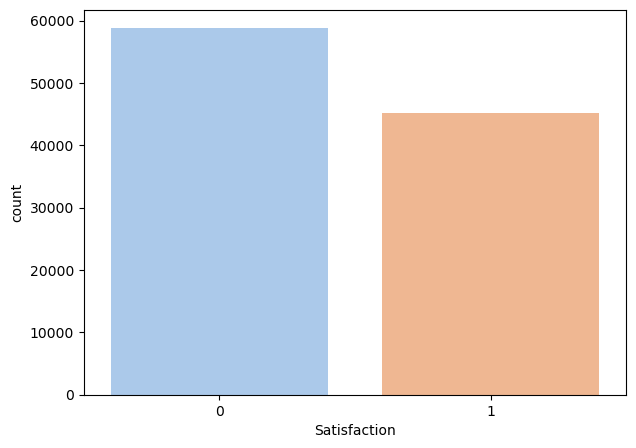

In [36]:
#Distribution of target variable
Col= ['Satisfaction']
for col in Col:
    plt.figure(figsize=(7,5))
    sns.countplot(x=col,data=y_train_full, palette="pastel")
    plt.show() #rather balanced distribution

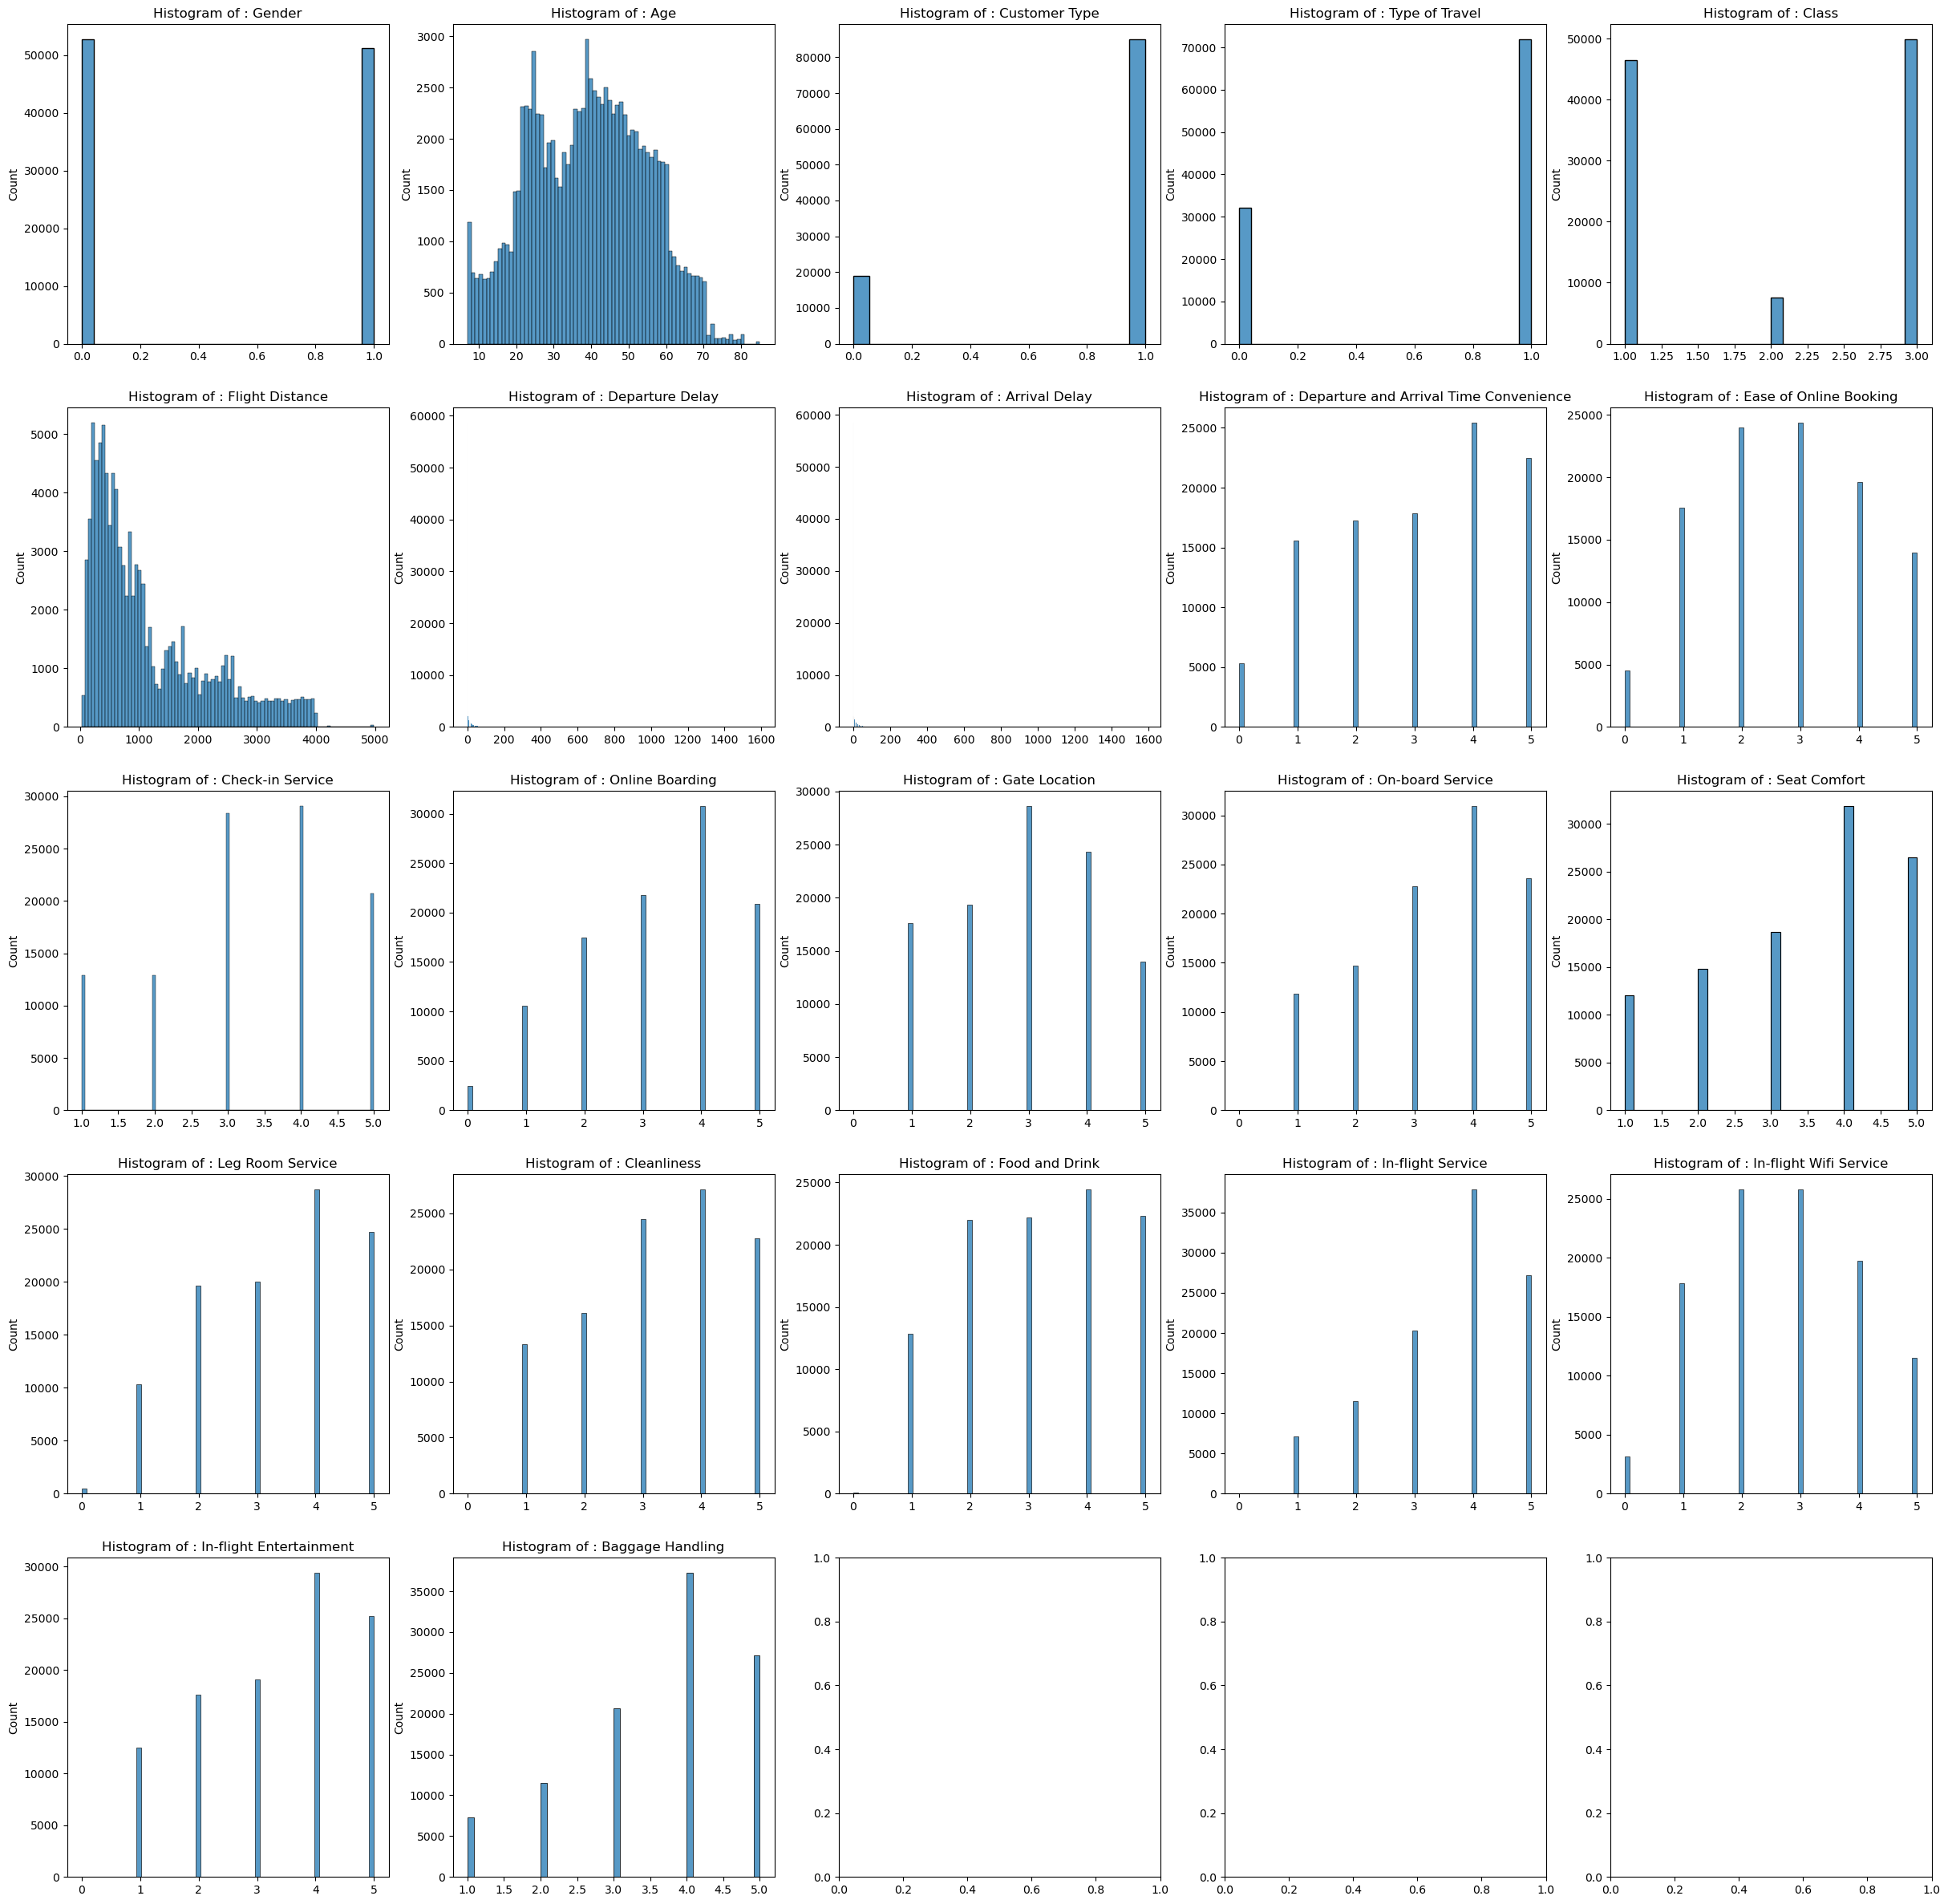

In [37]:
#Histplots of all variables
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(30, 30))
for i, ax in zip(x_train_full.columns, axes.flat):
    sns.histplot(x=x_train_full[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.show()

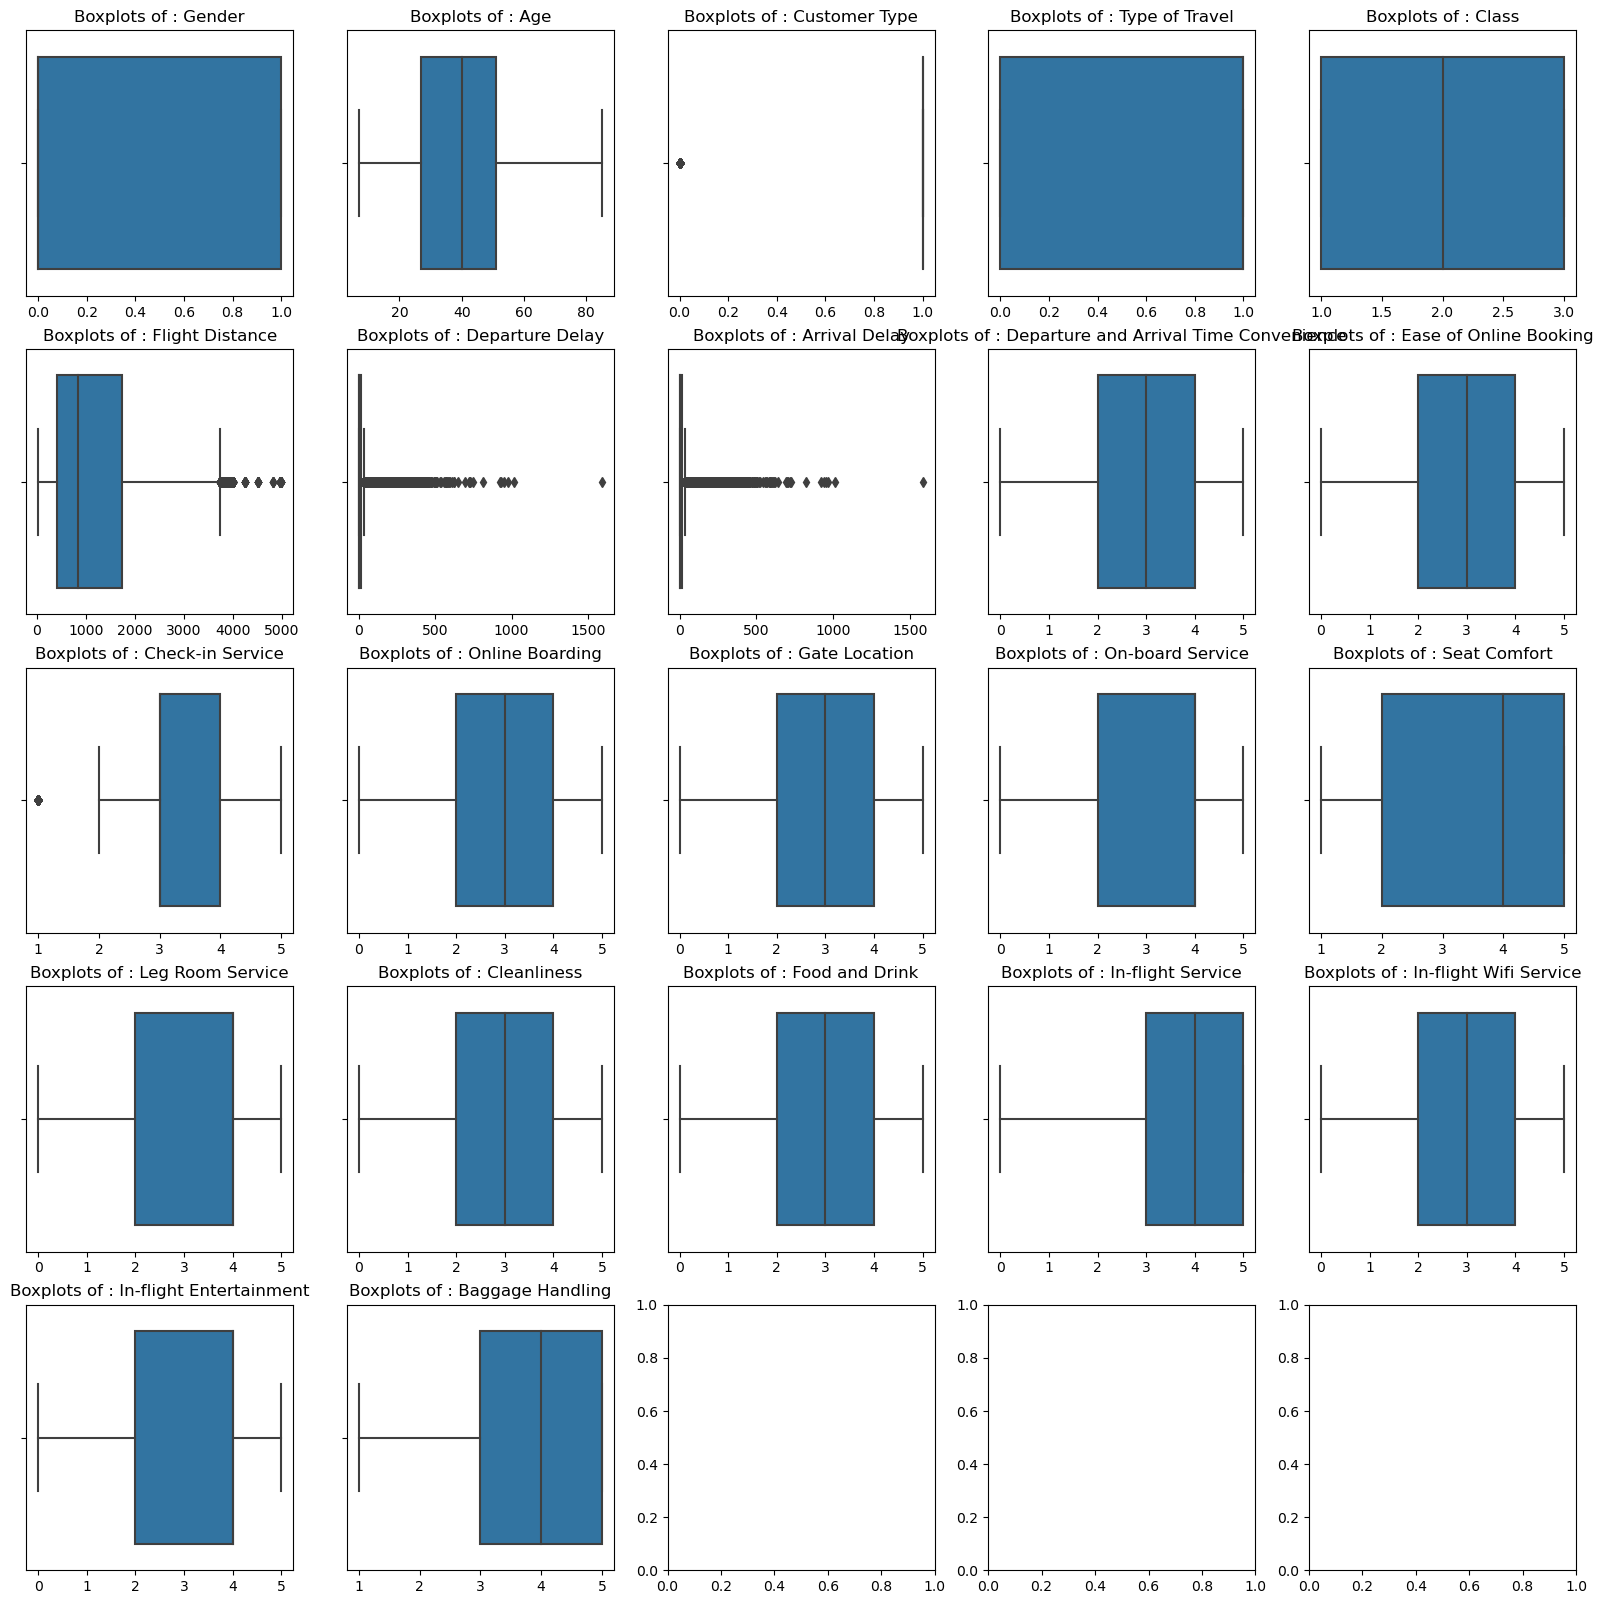

In [7]:
#Boxplots for all regressands
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(20, 20))
for i, ax in zip(x_train_full.columns, axes.flat):
    sns.boxplot(x=x_train_full[i], ax=ax).set(title=f"Boxplots of : {i}", xlabel="")
plt.show()

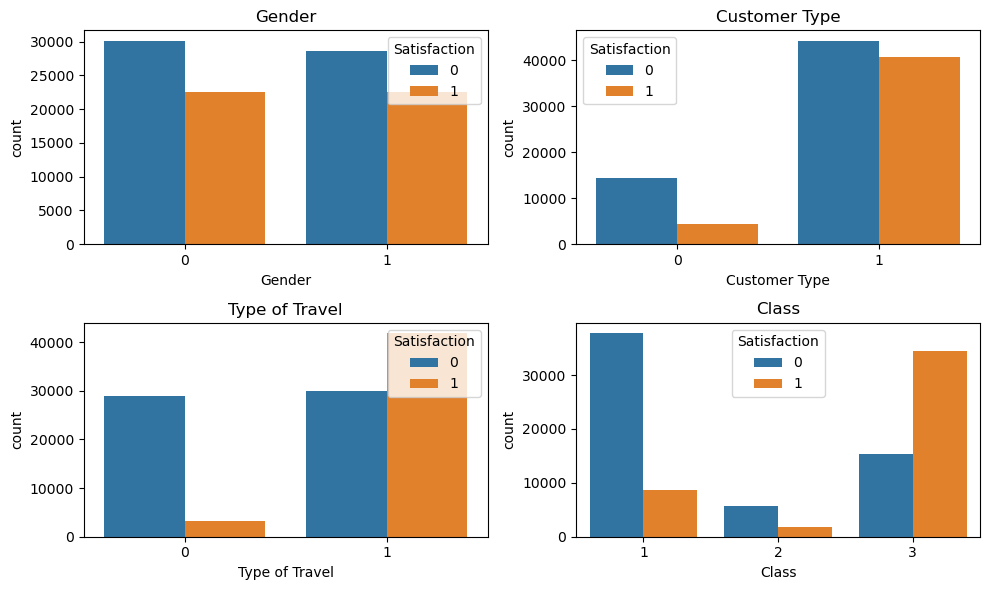

In [8]:
#Certain categorical variables regarding target distinction
my_data= ['Gender', 'Customer Type','Type of Travel','Class']
plt.figure(figsize=(10,6))
for i in range(len(my_data)):
    plt.subplot(2,2,i+1)
    plt.title(my_data[i])
    sns.countplot(x=x_train_full[my_data[i]],hue=y_train_full.Satisfaction)
plt.tight_layout()

<Axes: >

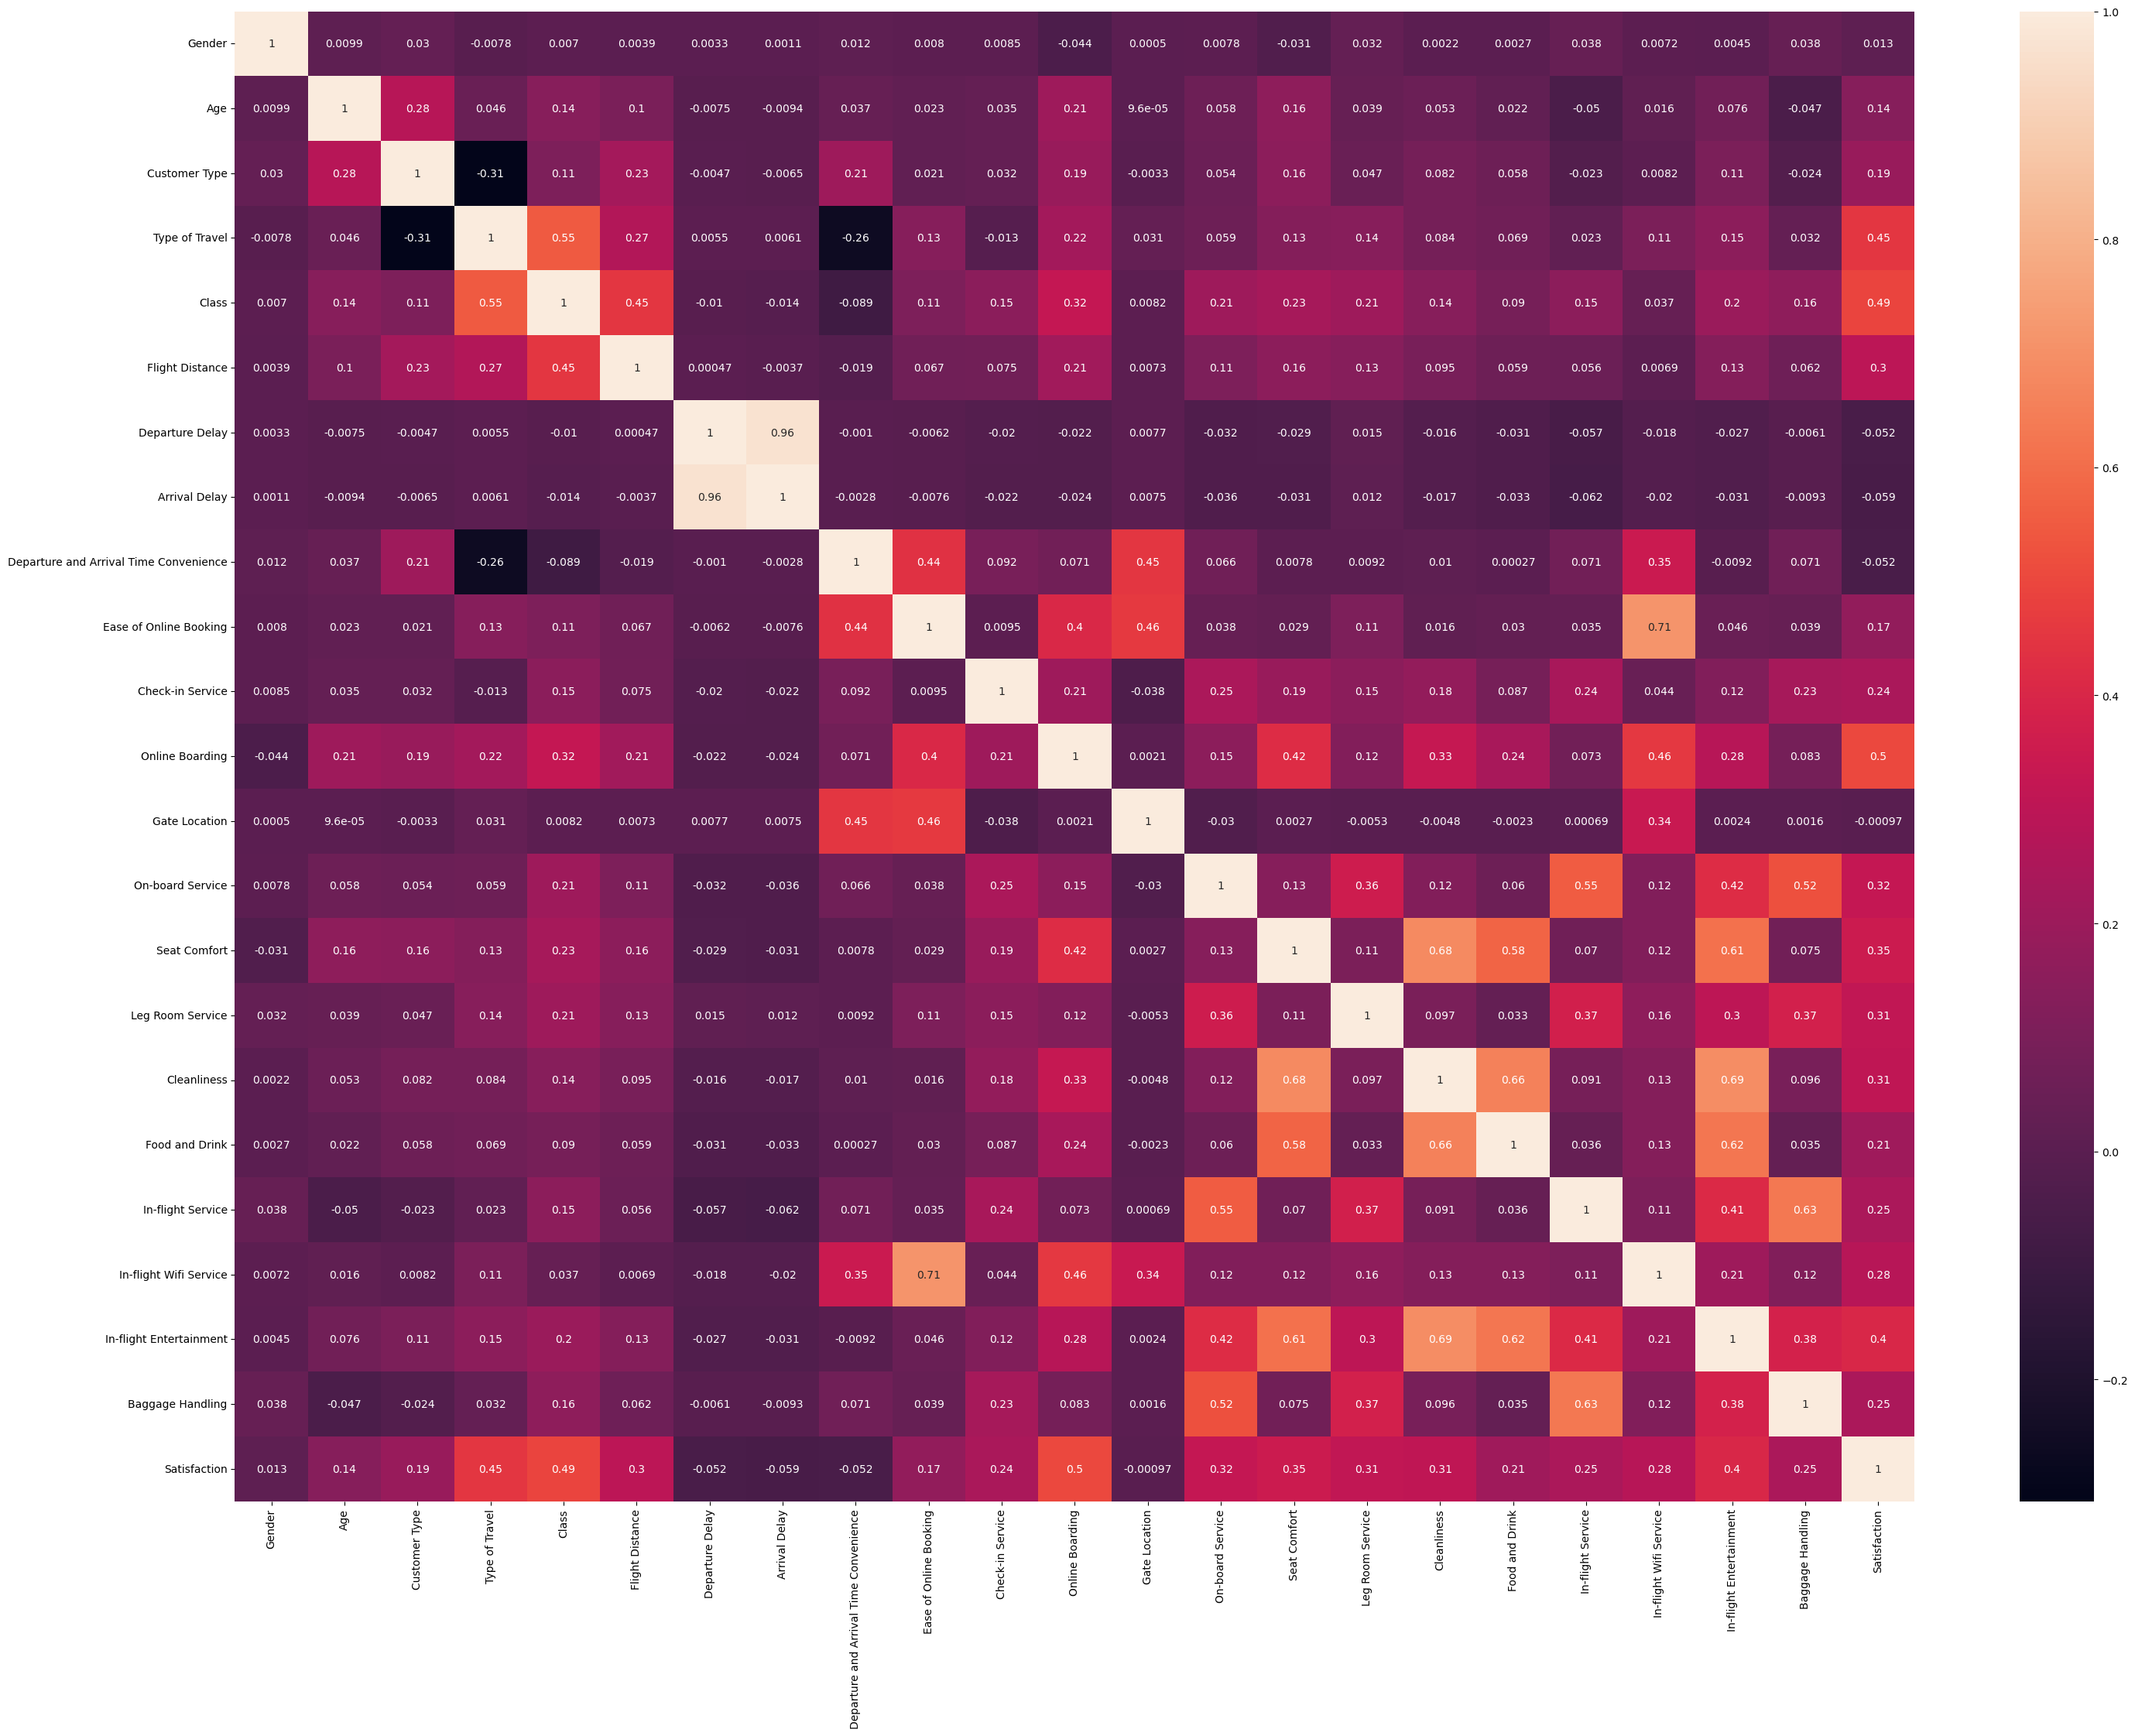

In [9]:
#Heatmap
plt.figure(figsize=(35,25))
sns.heatmap(df_train.corr(), annot=True)

STATISTICAL ANALYSIS

Univariate Analysis of "Age variable"

In [10]:
(sc.kurtosis(x_train_full.Age, axis=0, fisher=True, keepdims=False),
sc.skew(x_train_full.Age, axis=0, keepdims=False))

(-0.7147433335754485, -0.004671954480928973)

(5.375, 86.625)

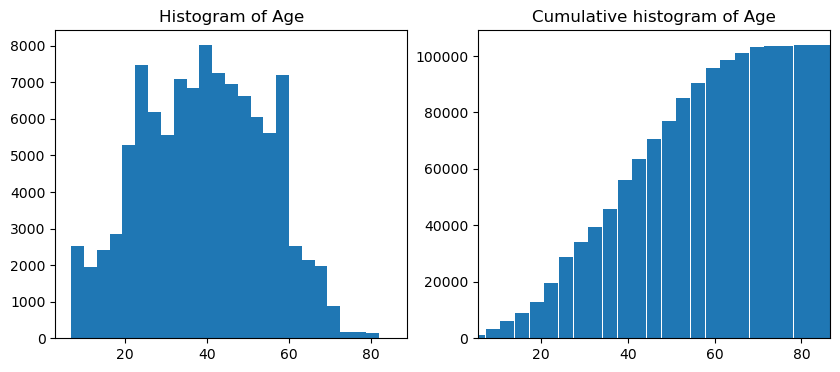

In [11]:
res = sc.cumfreq(x_train_full.Age, numbins=25)
fig = plt.figure(figsize=(10, 4))
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,
                                 res.cumcount.size)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(x_train_full.Age, bins=25)
ax1.set_title('Histogram of Age')
ax2.bar(x, res.cumcount, width=res.binsize)
ax2.set_title('Cumulative histogram of Age')
ax2.set_xlim([x.min(), x.max()])

In [12]:
#One-way ANOVA- H0: same mean "Age" between "Satisfaction" groups
sc.f_oneway(y_train_full.Satisfaction, x_train_full.Age, axis=0) #we reject H0: different means within groups

F_onewayResult(statistic=691535.7390457828, pvalue=0.0)

In [13]:
#Let's see whether "Age" has normal distribution
sc.normaltest(x_train_full.Age, axis=0) # no it doesn't

NormaltestResult(statistic=5893.9081056912855, pvalue=0.0)

In [14]:
#Non-parametrical one-way ANOVA (which is better due to lack of normal distribution assumption)
sc.kruskal(y_train_full.Satisfaction, x_train_full.Age, axis=0) #still we reject H0: different means within groups

KruskalResult(statistic=161160.83701202134, pvalue=0.0)

In [15]:
# Performing two-way ANOVA
model = smf.ols('y_train_full.Satisfaction ~ Class+Age+Gender',
            data=x_train_full).fit()
result = sm.stats.anova_lm(model, type=2)

# Print the result
print(result)  #H1: there is a difference in mean for each variable regarding "Satisfaction" variable

                df        sum_sq      mean_sq             F         PR(>F)
Class          1.0   6183.429933  6183.429933  33416.544881   0.000000e+00
Age            1.0    114.980695   114.980695    621.379653  9.481152e-137
Gender         1.0      1.818522     1.818522      9.827671   1.719537e-03
Residual  103900.0  19225.756953     0.185041           NaN            NaN


In [ ]:
FEATURE ENGINEERING

1) 'Arrival Delay' and "Departure Delay" The variables need some clipping to reduce the number of outliers.

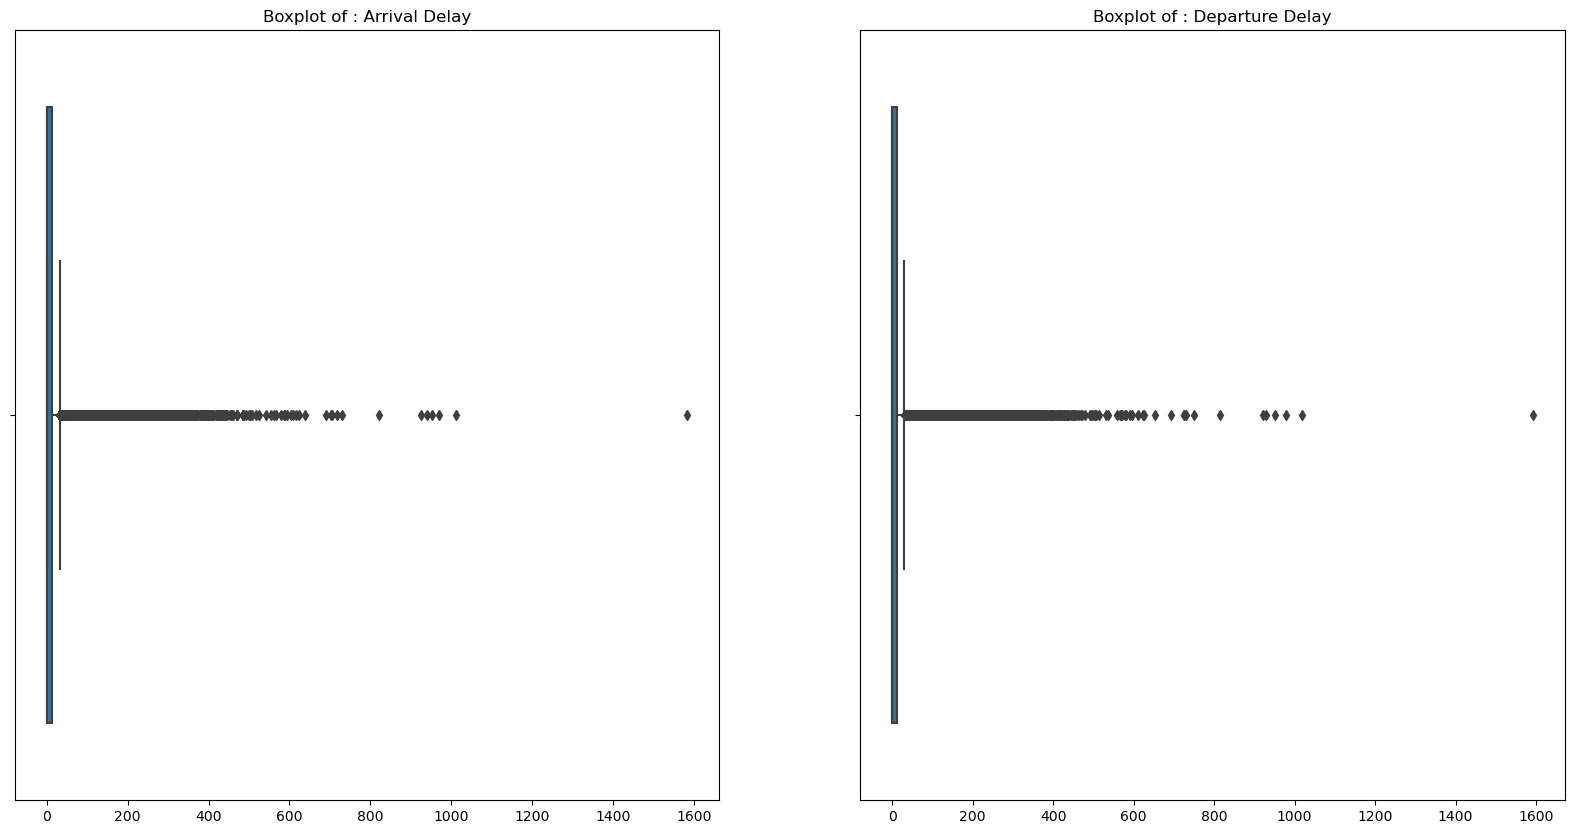

In [38]:
columns= ["Arrival Delay", "Departure Delay"]
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
for i, ax in zip(columns, axes.flat):
    sns.boxplot(x=x_train_full[i], ax=ax).set(title=f"Boxplot of : {i}", xlabel="")
plt.show() 

In [39]:
x_train["Arrival Delay"].describe()

count    83123.000000
mean        15.011345
std         38.150215
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1584.000000
Name: Arrival Delay, dtype: float64

<Axes: >

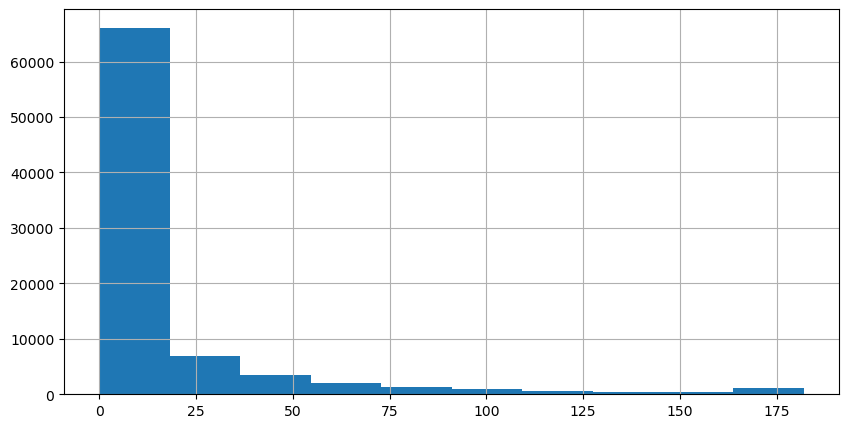

In [76]:
#We decide to cut the variable up to 0.99 centile
cutoff_arr_delay = x_train['Arrival Delay'].quantile(0.99)
x_train['Arrival Delay Cut']=x_train['Arrival Delay'].clip(upper=cutoff_arr_delay)
x_train['Arrival Delay Cut'].hist(figsize=(10, 5), bins=10) #still strong assymetry of data

<Axes: >

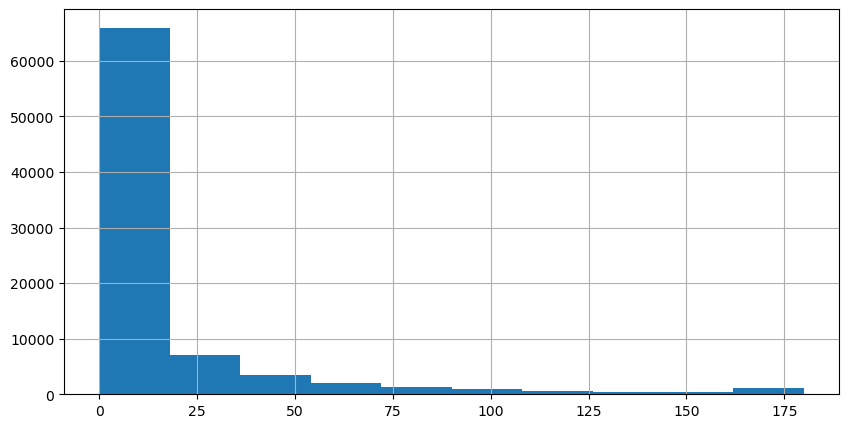

In [77]:
#Same transformation to 'Deprature delay'
cutoff_dep_delay = x_train['Departure Delay'].quantile(0.99)
x_train['Departure Delay Cut']=x_train['Departure Delay'].clip(upper=cutoff_dep_delay)
x_train['Departure Delay Cut'].hist(figsize=(10, 5), bins=10) #still strong assymetry of data

2. Flight Distance The variable needs a logarithm transformation due to large numbers

C:\Users\mbuda\AppData\Local\Temp\ipykernel_16632\2420972630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train.iloc[:,5], color="olive")


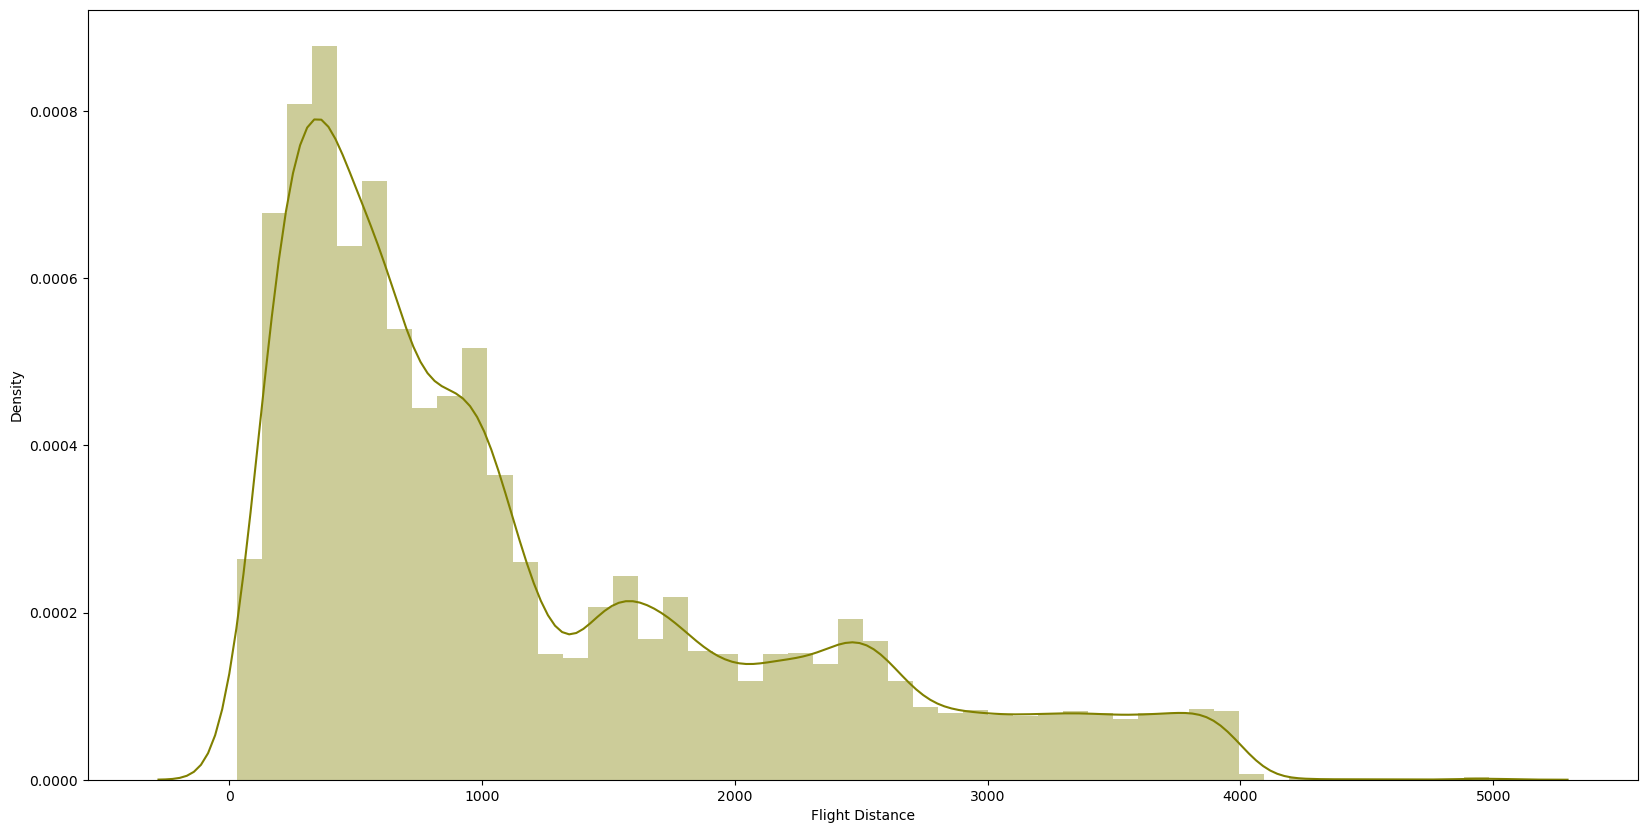

In [42]:
plt.subplots(figsize=(20,10), sharex=False)
sns.distplot(x_train.iloc[:,5], color="olive")
plt.show()

In [78]:
x_train["Flight Distance Log"]=np.log(x_train["Flight Distance"])

<Axes: >

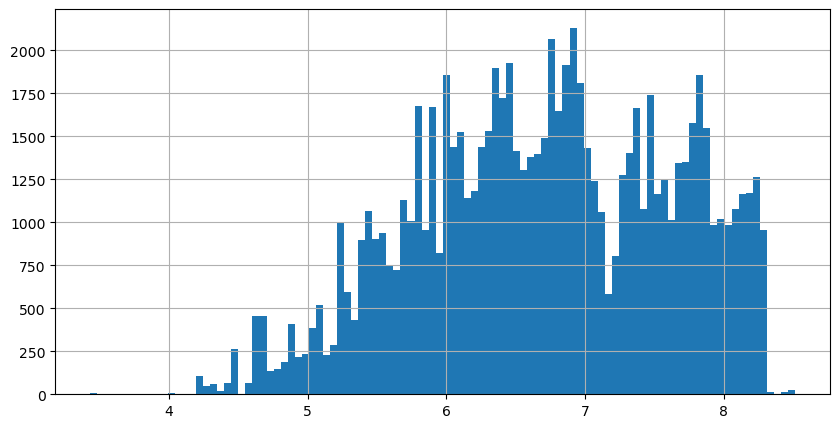

In [43]:
np.log(x_train["Flight Distance"]).hist(figsize=(10, 5), bins=100) #seems reasonable

3. Age The variable should be standardized

<Axes: xlabel='Gender', ylabel='Age'>

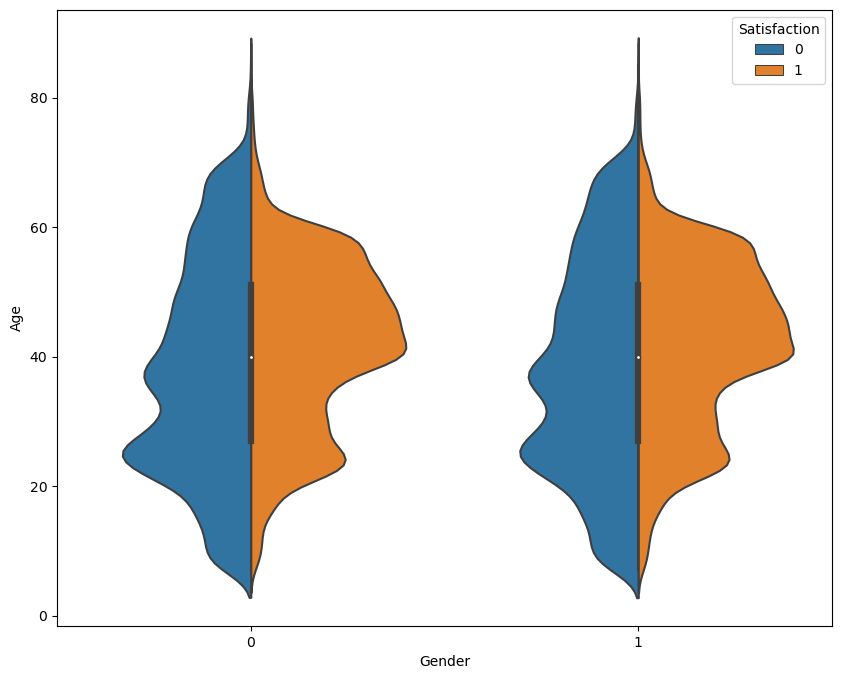

In [44]:
#Violin plot for "Age"
fig = plt.figure(figsize=(10,8))
sns.violinplot(x=x_train_full['Gender'], y=x_train_full['Age'], hue=y_train_full.Satisfaction,split=True) 

C:\Users\mbuda\AppData\Local\Temp\ipykernel_16632\1262797404.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train.iloc[:,1], color="skyblue")


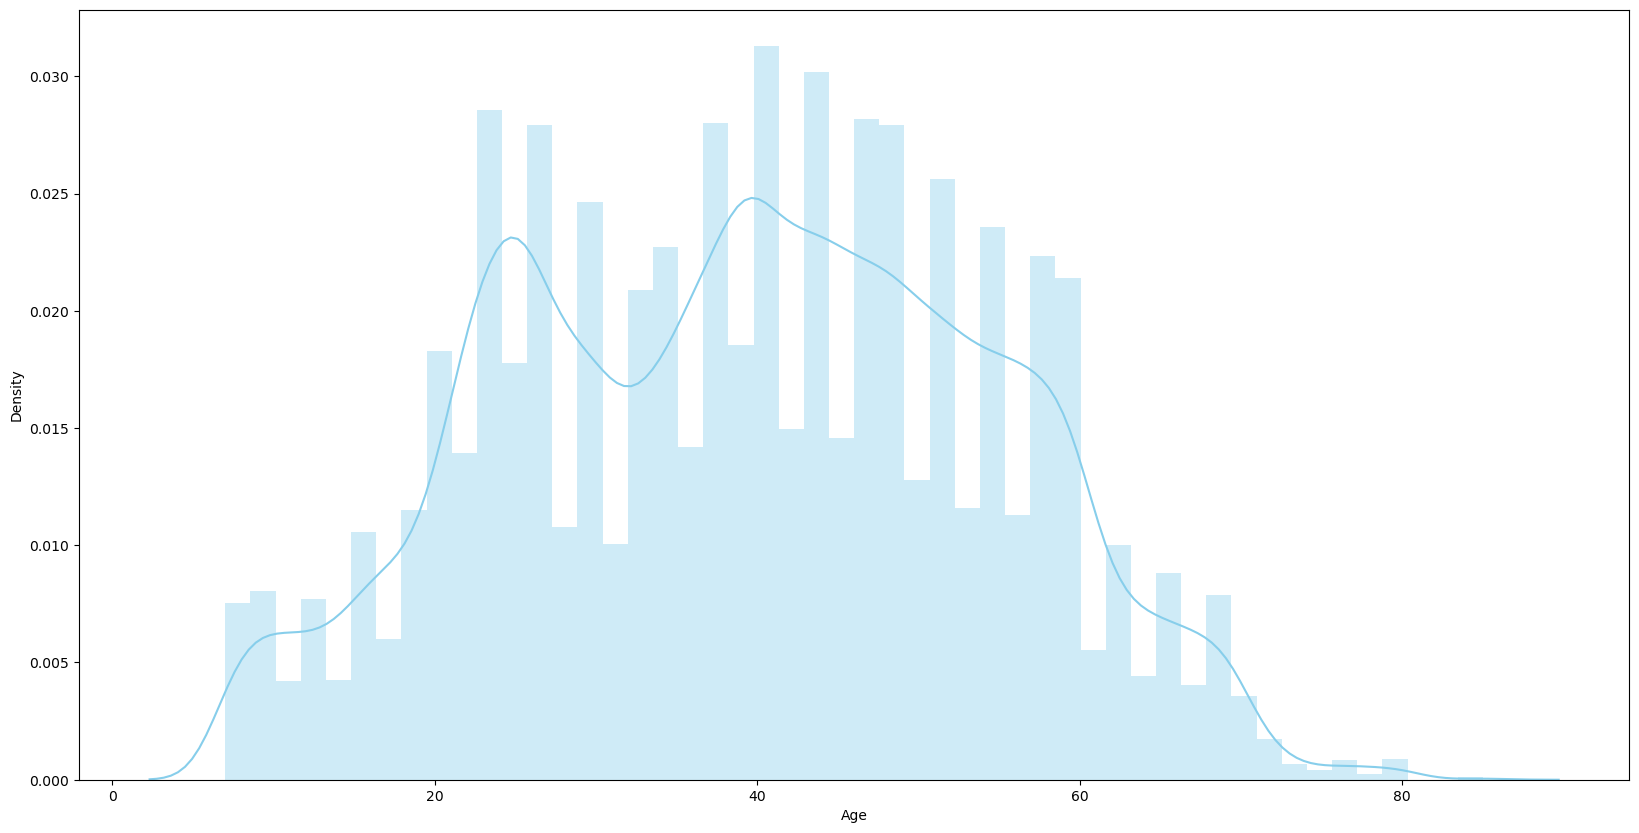

In [45]:
plt.subplots(figsize=(20,10), sharex=False)
sns.distplot(x_train.iloc[:,1], color="skyblue")
plt.show() #Gaussian-like shape of plot

In [79]:
scaler = StandardScaler()
scaler.fit(x_train["Age"].values.reshape(-1,1))

StandardScaler()

<Axes: >

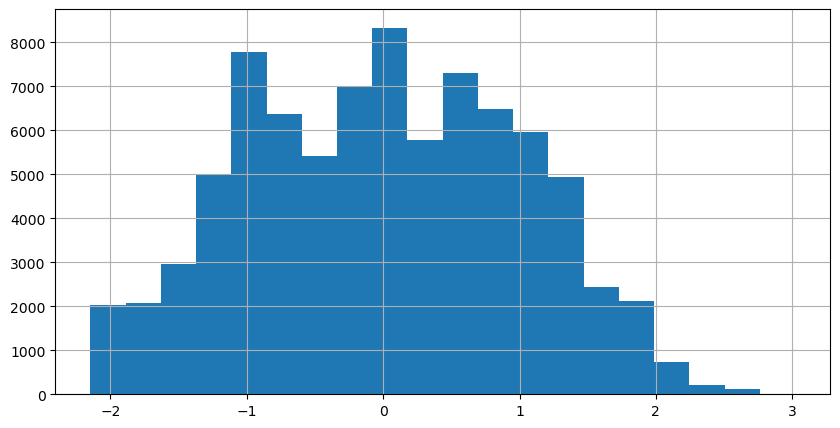

In [80]:
x_train["Age ZScore"] = scaler.transform(x_train["Age"].values.reshape(-1,1))
x_train["Age ZScore"].hist(figsize=(10, 5), bins=20)

Let's drop the "initial" variables that were transformed

In [81]:
x_train = x_train.drop(columns=["Age"])
x_train = x_train.drop(columns=["Flight Distance"])
x_train = x_train.drop(columns=["Departure Delay"])
x_train = x_train.drop(columns=["Arrival Delay"])

Final "polishing" of data

In [82]:
#Clearing of tags
def clear_names(pandas_cols):
    return (
        pandas_cols.str.replace(" ", "_")
        .str.replace("(", "")
        .str.replace(")", "")
        .str.replace("[", "")
        .str.replace("]", "")
        .str.replace(",", "")
        .str.replace("-", "_")
        .str.lower()
        .str.normalize("NFKD")
        .str.encode("ascii", errors="ignore")
        .str.decode("utf-8")
    )

In [83]:
x_train.columns = clear_names(x_train.columns)

In [84]:
#Downcast of dataframe
def downcast_dataframe(data):
    # Source: https://www.kaggle.com/anshuls235/time-series-forecasting-eda-fe-modelling
    df = data.copy()

    print("BEFORE downcast")
    print(df.info(memory_usage="deep"))
    print("=================")
    print("=================", "\n")

    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i, t in enumerate(types):
        # Integer
        if "int" in str(t):
            # Check if minimum and maximum are in the limit of int8
            if (
                df[cols[i]].min() > np.iinfo(np.int8).min
                and df[cols[i]].max() < np.iinfo(np.int8).max
            ):
                df[cols[i]] = df[cols[i]].astype(np.int8)
            # Check if minimum and maximum are in the limit of int16
            elif (
                df[cols[i]].min() > np.iinfo(np.int16).min
                and df[cols[i]].max() < np.iinfo(np.int16).max
            ):
                df[cols[i]] = df[cols[i]].astype(np.int16)
            # Check if minimum and maximum are in the limit of int32
            elif (
                df[cols[i]].min() > np.iinfo(np.int32).min
                and df[cols[i]].max() < np.iinfo(np.int32).max
            ):
                df[cols[i]] = df[cols[i]].astype(np.int32)
            # Choose int64
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        # Float
        elif "float" in str(t):
            if (
                df[cols[i]].min() > np.finfo(np.float32).min
                and df[cols[i]].max() < np.finfo(np.float32).max
            ):
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        # Object
        elif t == object:
            if cols[i] == "date":
                df[cols[i]] = pd.to_datetime(df[cols[i]], format="%Y-%m-%d")
            else:
                df[cols[i]] = df[cols[i]].astype("category")
    print("AFTER downcast")
    print(df.info(memory_usage="deep"))
    return df

In [85]:
x_train = downcast_dataframe(x_train) 

BEFORE downcast
<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 21559 to 63008
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  83123 non-null  int64  
 1   customer_type                           83123 non-null  int64  
 2   type_of_travel                          83123 non-null  int64  
 3   class                                   83123 non-null  int64  
 4   departure_and_arrival_time_convenience  83123 non-null  int64  
 5   ease_of_online_booking                  83123 non-null  int64  
 6   check_in_service                        83123 non-null  int64  
 7   online_boarding                         83123 non-null  int64  
 8   gate_location                           83123 non-null  int64  
 9   on_board_service                        83123 non-null  int64  
 10  seat_comfort                          

In [86]:
#Let's apply same trasformations to validation set and test set
x_test['Arrival Delay'].fillna(x_test['Arrival Delay'].median(), inplace=True)
cutoff_arr_delay = x_test['Arrival Delay'].quantile(0.99)
x_test['Arrival Delay Cut']=x_test['Arrival Delay'].clip(upper=cutoff_arr_delay)
cutoff_dep_delay = x_test['Departure Delay'].quantile(0.99)
x_test['Departure Delay Cut']=x_test['Departure Delay'].clip(upper=cutoff_dep_delay)
x_test["Flight Distance Log"]=np.log(x_test["Flight Distance"])
scaler = StandardScaler()
scaler.fit(x_test["Age"].values.reshape(-1,1))
x_test["Age ZScore"] = scaler.transform(x_test["Age"].values.reshape(-1,1))
x_test = x_test.drop(columns=["Age"])
x_test = x_test.drop(columns=["Flight Distance"])
x_test = x_test.drop(columns=["Departure Delay"])
x_test = x_test.drop(columns=["Arrival Delay"])
x_test.columns = clear_names(x_test.columns)
x_test = downcast_dataframe(x_test)

BEFORE downcast
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 28551 to 33813
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  25976 non-null  int64  
 1   customer_type                           25976 non-null  int64  
 2   type_of_travel                          25976 non-null  int64  
 3   class                                   25976 non-null  int64  
 4   departure_and_arrival_time_convenience  25976 non-null  int64  
 5   ease_of_online_booking                  25976 non-null  int64  
 6   check_in_service                        25976 non-null  int64  
 7   online_boarding                         25976 non-null  int64  
 8   gate_location                           25976 non-null  int64  
 9   on_board_service                        25976 non-null  int64  
 10  seat_comfort                          

In [87]:
x_val['Arrival Delay'].fillna(x_val['Arrival Delay'].median(), inplace=True)
cutoff_arr_delay = x_val['Arrival Delay'].quantile(0.99)
x_val['Arrival Delay Cut']=x_val['Arrival Delay'].clip(upper=cutoff_arr_delay)
cutoff_dep_delay = x_val['Departure Delay'].quantile(0.99)
x_val['Departure Delay Cut']=x_val['Departure Delay'].clip(upper=cutoff_dep_delay)
x_val["Flight Distance Log"]=np.log(x_val["Flight Distance"])
scaler = StandardScaler()
scaler.fit(x_val["Age"].values.reshape(-1,1))
x_val["Age ZScore"] = scaler.transform(x_val["Age"].values.reshape(-1,1))
x_val = x_val.drop(columns=["Age"])
x_val = x_val.drop(columns=["Flight Distance"])
x_val = x_val.drop(columns=["Departure Delay"])
x_val = x_val.drop(columns=["Arrival Delay"])
x_val.columns = clear_names(x_val.columns)
x_val = downcast_dataframe(x_val)

BEFORE downcast
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20781 entries, 90110 to 90155
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  20781 non-null  int64  
 1   customer_type                           20781 non-null  int64  
 2   type_of_travel                          20781 non-null  int64  
 3   class                                   20781 non-null  int64  
 4   departure_and_arrival_time_convenience  20781 non-null  int64  
 5   ease_of_online_booking                  20781 non-null  int64  
 6   check_in_service                        20781 non-null  int64  
 7   online_boarding                         20781 non-null  int64  
 8   gate_location                           20781 non-null  int64  
 9   on_board_service                        20781 non-null  int64  
 10  seat_comfort                          

In [88]:
#Same procedure for artificial datasets that contain target variable
df_train['Arrival Delay'].fillna(df_train['Arrival Delay'].median(), inplace=True)
cutoff_arr_delay = df_train['Arrival Delay'].quantile(0.99)
df_train['Arrival Delay Cut']=df_train['Arrival Delay'].clip(upper=cutoff_arr_delay)
cutoff_dep_delay = df_train['Departure Delay'].quantile(0.99)
df_train['Departure Delay Cut']=df_train['Departure Delay'].clip(upper=cutoff_dep_delay)
df_train["Flight Distance Log"]=np.log(df_train["Flight Distance"])
scaler = StandardScaler()
scaler.fit(df_train["Age"].values.reshape(-1,1))
df_train["Age ZScore"] = scaler.transform(df_train["Age"].values.reshape(-1,1))
df_train = df_train.drop(columns=["Age"])
df_train = df_train.drop(columns=["Flight Distance"])
df_train = df_train.drop(columns=["Departure Delay"])
df_train = df_train.drop(columns=["Arrival Delay"])
df_train.columns = clear_names(df_train.columns)
df_train = downcast_dataframe(df_train)

BEFORE downcast
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 74733 to 118270
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   gender                                  103904 non-null  int64  
 1   customer_type                           103904 non-null  int64  
 2   type_of_travel                          103904 non-null  int64  
 3   class                                   103904 non-null  int64  
 4   departure_and_arrival_time_convenience  103904 non-null  int64  
 5   ease_of_online_booking                  103904 non-null  int64  
 6   check_in_service                        103904 non-null  int64  
 7   online_boarding                         103904 non-null  int64  
 8   gate_location                           103904 non-null  int64  
 9   on_board_service                        103904 non-null  int64  
 10  seat_comfort            

In [89]:
df_test['Arrival Delay'].fillna(df_test['Arrival Delay'].median(), inplace=True)
cutoff_arr_delay = df_test['Arrival Delay'].quantile(0.99)
df_test['Arrival Delay Cut']=df_test['Arrival Delay'].clip(upper=cutoff_arr_delay)
cutoff_dep_delay = df_test['Departure Delay'].quantile(0.99)
df_test['Departure Delay Cut']=df_test['Departure Delay'].clip(upper=cutoff_dep_delay)
df_test["Flight Distance Log"]=np.log(df_test["Flight Distance"])
scaler = StandardScaler()
scaler.fit(df_test["Age"].values.reshape(-1,1))
df_test["Age ZScore"] = scaler.transform(df_test["Age"].values.reshape(-1,1))
df_test = df_test.drop(columns=["Age"])
df_test = df_test.drop(columns=["Flight Distance"])
df_test = df_test.drop(columns=["Departure Delay"])
df_test = df_test.drop(columns=["Arrival Delay"])
df_test.columns = clear_names(df_test.columns)
df_test = downcast_dataframe(df_test)

BEFORE downcast
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 28551 to 33813
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  25976 non-null  int64  
 1   customer_type                           25976 non-null  int64  
 2   type_of_travel                          25976 non-null  int64  
 3   class                                   25976 non-null  int64  
 4   departure_and_arrival_time_convenience  25976 non-null  int64  
 5   ease_of_online_booking                  25976 non-null  int64  
 6   check_in_service                        25976 non-null  int64  
 7   online_boarding                         25976 non-null  int64  
 8   gate_location                           25976 non-null  int64  
 9   on_board_service                        25976 non-null  int64  
 10  seat_comfort                          

In [90]:
#Sanity check
set(x_train.columns) - set(x_test.columns)

set()

LOGISTIC REGRESSION- MODEL PREPARATION

In [91]:
#Skicit library
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x_train_scaled= scaler.fit_transform(x_train)
x_val_scaled=scaler.fit_transform(x_val)
x_test_scaled = scaler.fit_transform(x_test)

In [92]:
lr = LogisticRegression(penalty=None)
print(x_train_scaled)

[[ 1.0171459  -2.111616    0.66948605 ... -0.44838715 -0.8440708
  -1.218936  ]
 [-0.98314315  0.473571    0.66948605 ... -0.44838715 -0.28224987
  -2.0799844 ]
 [-0.98314315  0.473571   -1.493683   ... -0.44838715  0.74622625
   1.9603196 ]
 ...
 [ 1.0171459   0.473571    0.66948605 ... -0.44838715  1.5150205
  -0.4903566 ]
 [ 1.0171459   0.473571   -1.493683   ... -0.44838715  0.570536
   1.3642092 ]
 [-0.98314315 -2.111616    0.66948605 ... -0.44838715  0.18339892
  -0.4903566 ]]


In [93]:
lr.fit(x_train_scaled , y_train.to_numpy().ravel())

LogisticRegression(penalty=None)

In [94]:
lr.score(x_train_scaled , y_train.to_numpy().ravel()) #score on train quite decent

0.874114264403354

In [95]:
lr.score(x_test_scaled , y_test.to_numpy().ravel()) #pretty similar output 

0.8741915614413305

In [96]:
Y_pred = lr.predict(x_test_scaled)
data = pd.DataFrame({"Y_test" : y_test.Satisfaction , "Y_pred": Y_pred})
data.head(20) #still we can see even in this batch some FP and FN

,Y_test,Y_pred
28551,0,0
64771,1,1
86495,0,0
113447,1,1
123276,0,0
103914,0,0
115567,1,1
83826,0,1
17834,1,1
107471,0,0


In [97]:
print(classification_report(y_test,Y_pred)) #classification report

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14662
           1       0.87      0.83      0.85     11314

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [98]:
#Type I and II errors matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

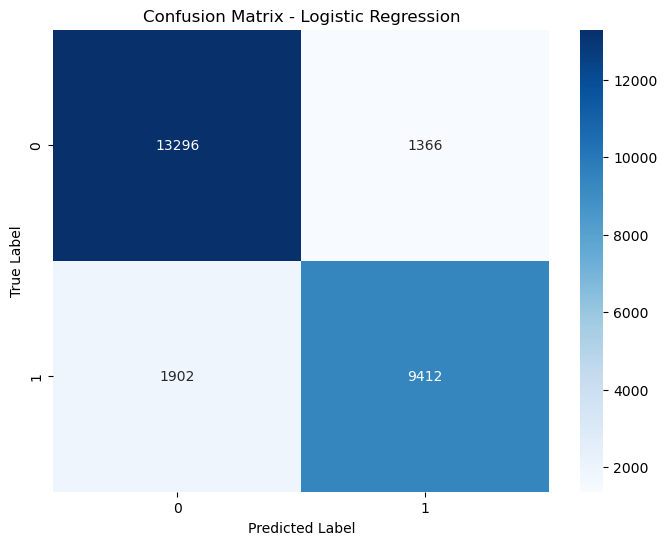

In [99]:
y_pred = lr.predict(x_test_scaled)
plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix - Logistic Regression') #regarding satisfaction level we want more to avoid FP (more important than to avoid FN)

FEATURE SELECTION

In [100]:
#Feature selection for model based on correlation
feature_selection_with_corr = (df_train.corr(method="spearman")["satisfaction"]
  .apply(np.abs)
  .sort_values(ascending=False)
 )

feature_selection_with_corr

satisfaction                              1.000000
online_boarding                           0.550152
class                                     0.492967
type_of_travel                            0.449314
in_flight_entertainment                   0.400665
seat_comfort                              0.363986
on_board_service                          0.328122
leg_room_service                          0.317202
cleanliness                               0.306456
in_flight_wifi_service                    0.286471
baggage_handling                          0.271190
in_flight_service                         0.265880
flight_distance_log                       0.255021
check_in_service                          0.236024
food_and_drink                            0.209802
customer_type                             0.189022
ease_of_online_booking                    0.173773
age_zscore                                0.145128
arrival_delay_cut                         0.100194
departure_delay_cut            

Text(0.5, 1.0, 'Feature selection based on correlation')

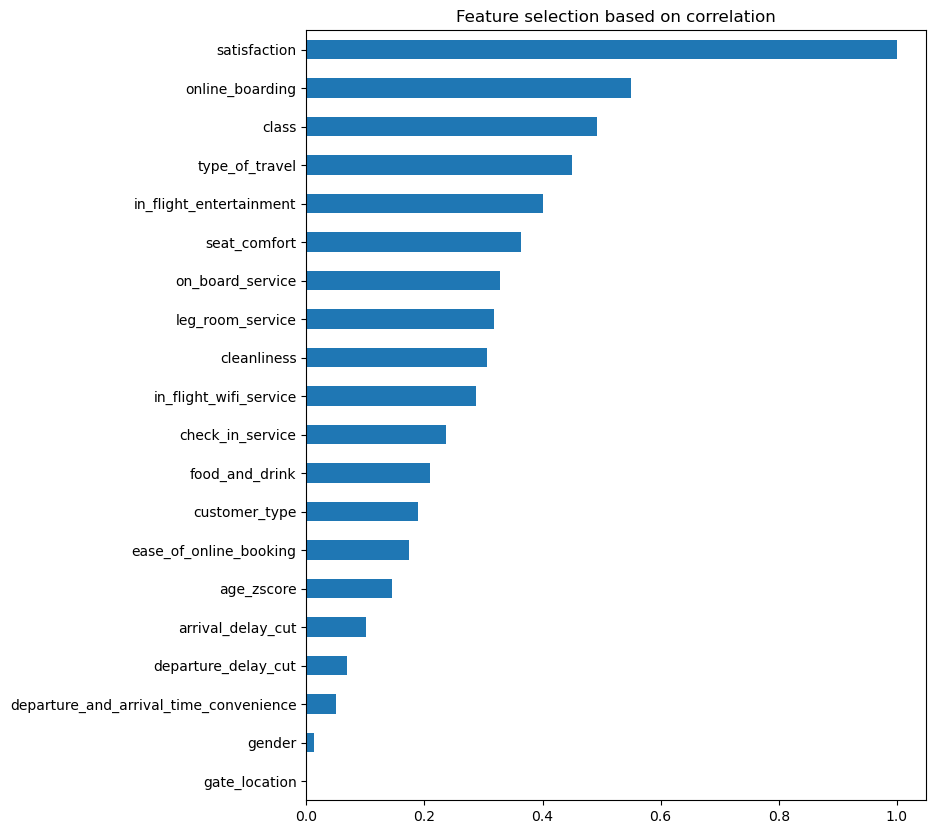

In [101]:
coef = pd.Series(feature_selection_with_corr)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

plt.rcParams["figure.figsize"] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Feature selection based on correlation")

We also create the wrapper functions for modelling and scoring.

In [102]:
#Wrapper for Modelling and scoring
def logit_model_wrapper(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    X_test: pd.DataFrame,
    fit_intercept: bool=True,
) -> np.array :
    reg = LogisticRegression(fit_intercept=fit_intercept)
    reg.fit(X=X_train, y=y_train)
    pred = reg.predict(X_test)
    return pred.ravel()  


def scoring_wrapper(y_true: np.array, y_pred: np.array) -> dict:
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    fbeta_precision = metrics.fbeta_score(y_true, y_pred, beta=0.25) #more emphasis on precision
    fbeta_recall = metrics.fbeta_score(y_true, y_pred, beta=0.75) #more emphasis on recall
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "fbeta_precision": fbeta_precision, "fbeta_recall": fbeta_recall}

Let's create the first model - we will apply the econometric GETS.

In [103]:
scores_on_train = dict()

for i in tqdm(range(1, 23)):
    feautres_i = feature_selection_with_corr.index[1 : 1 + i]
    pred = logit_model_wrapper(
        df_train[feautres_i], df_train[["satisfaction"]], df_train[feautres_i]
    )
    score = scoring_wrapper(df_train[["satisfaction"]].to_numpy().ravel(), pred)
    scores_on_train.update({f"top_{i}": score})

  0%|                                                                                           | 0/22 [00:00<?, ?it/s]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  5%|███▊                                                                               | 1/22 [00:00<00:05,  4.12it/s]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  9%|███████▌                                                                           | 2/22 [00:00<00:04,  4.20it/s]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-ve

 86%|██████████████████████████████████████████████████████████████████████▊           | 19/22 [00:13<00:03,  1.19s/it]C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 91%|██████████████████████████████████████████████████████████████████████████▌       | 20/22 [00:14

In [104]:
#Firstly let's sort by precision
pd.DataFrame(scores_on_train).T.sort_values("precision") #best precision for 17, not all 22 variables- some of them must be excluded

,accuracy,precision,recall,fbeta_precision,fbeta_recall
top_1,0.787092,0.722713,0.826905,0.728110,0.757054
top_2,0.788882,0.735856,0.801459,0.739416,0.758198
top_3,0.812644,0.763062,0.824511,0.766422,0.784100
top_5,0.835107,0.811391,0.808064,0.811195,0.810190
top_4,0.835098,0.811401,0.808020,0.811201,0.810180
top_22,0.847051,0.819856,0.830141,0.820454,0.823529
top_6,0.841623,0.820402,0.813273,0.819979,0.817821
top_20,0.849582,0.825434,0.828856,0.825635,0.826663
top_18,0.854173,0.830560,0.834353,0.830783,0.831922
top_19,0.851709,0.830743,0.826950,0.830519,0.829373


Let's analyse the ROC curve for the logistic regression with all variables

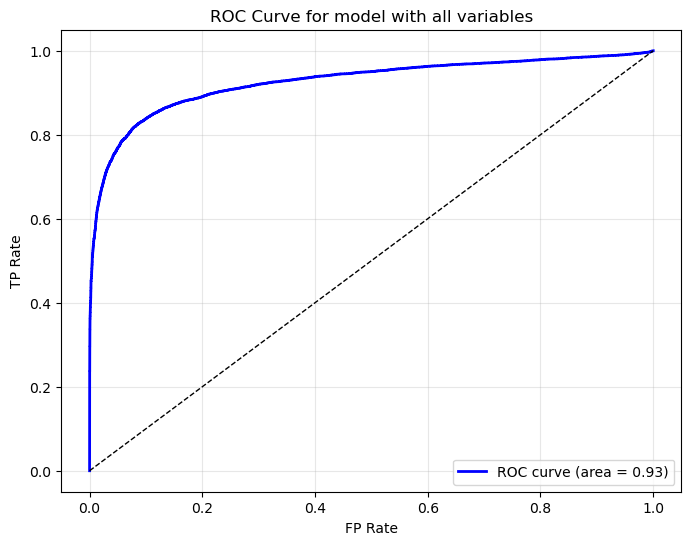

In [105]:
#Let's analyse the ROC curve for the logistic regression with all variables
y_proba = lr.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.Satisfaction, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve for model with all variables')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

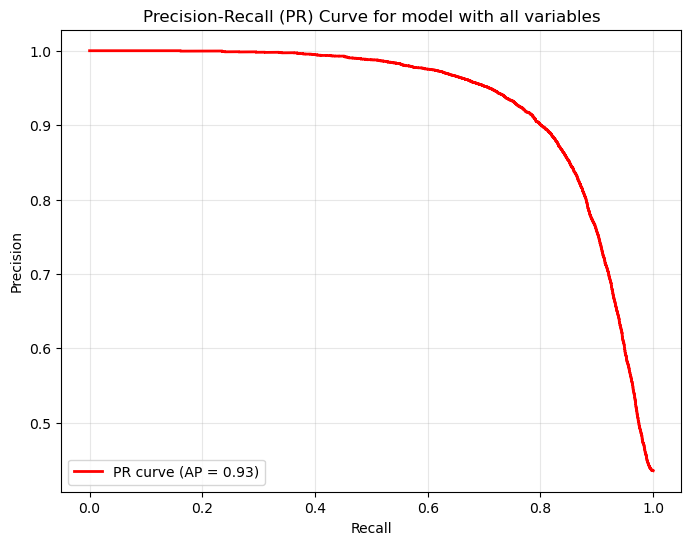

In [106]:
#Let's also look at Precision-Recall trade-off in our model
precision, recall, thresholds = precision_recall_curve(y_test.Satisfaction, y_proba)
average_precision = average_precision_score(y_test.Satisfaction, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve for model with all variables')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
LOGISTIC REGRESSION- MODEL EVAULATION WITH CROSS-VALIDATION METHODS

In [107]:
#Here are 17 variables that we will include in our model, basing their impact on correlation with target
features = ['customer_type', 'type_of_travel', 'class', 'ease_of_online_booking',
       'check_in_service', 'online_boarding',
       'on_board_service', 'seat_comfort', 'leg_room_service', 'cleanliness',
       'food_and_drink', 'in_flight_service', 'in_flight_wifi_service',
       'in_flight_entertainment', 'baggage_handling', 'flight_distance_log', 'age_zscore']

We apply several CV methodologies - standard, randomized, and using ShuffleSplit function

In [108]:
#Standard K-Folds cross-validation
train_prec_list = list()
val_prec_list = list()

kf = KFold(n_splits=5, shuffle=False, random_state=None)
for train_index, val_index in kf.split(df_train.index.values):
    reg = LogisticRegression(fit_intercept=True)
    reg.fit(
        X=df_train[features].iloc[train_index],
        y=df_train[["satisfaction"]].iloc[train_index],
    )
    pred_train = reg.predict(df_train[features].iloc[train_index]).ravel()
    pred_val = reg.predict(df_train[features].iloc[val_index]).ravel()
    train_prec = scoring_wrapper(
        df_train[["satisfaction"]].iloc[train_index], pred_train
    ).get("precision")
    val_prec = scoring_wrapper(df_train[["satisfaction"]].iloc[val_index], pred_val).get(
        "precision"
    )
    train_prec_list.append(train_prec)
    val_prec_list.append(val_prec)
    print(
        "Train Precision:",
        train_prec,
        "Validation Precision:",
        val_prec,
    )

print(
    "avg Train Precision:", np.mean(train_prec_list), "avg Validation Precision", np.mean(val_prec_list)
)
#Average Precision is higher than the precision level for regression with 17 variables (0.866989)

C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8663732343718535 Validation Precision: 0.8709602418042316


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.867641956748005 Validation Precision: 0.8684089867033471


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8678387477340086 Validation Precision: 0.86266589728794


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8665363273051379 Validation Precision: 0.8683905380333952


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8667666397508363 Validation Precision: 0.8654810761513908
avg Train Precision: 0.8670313811819682 avg Validation Precision 0.8671813479960611


In [109]:
#Randomized K-Folds cross-validation
train_prec_list = list()
val_prec_list = list()

kf = KFold(n_splits=10, shuffle=True, random_state=123)
for train_index, val_index in kf.split(df_train.index.values):
    reg = LogisticRegression(fit_intercept=True)
    reg.fit(
        X=df_train[features].iloc[train_index],
        y=df_train[["satisfaction"]].iloc[train_index],
    )
    pred_train = reg.predict(df_train[features].iloc[train_index]).ravel()
    pred_val = reg.predict(df_train[features].iloc[val_index]).ravel()
    train_prec = scoring_wrapper(
        df_train[["satisfaction"]].iloc[train_index], pred_train
    ).get("precision")
    val_prec = scoring_wrapper(df_train[["satisfaction"]].iloc[val_index], pred_val).get(
        "precision"
    )
    train_prec_list.append(train_prec)
    val_prec_list.append(val_prec)
    print(
        "Train Precision:",
        train_prec,
        "Valid Recall:",
        val_prec,
    )

print(
    "avg Train Precision:", np.mean(train_prec_list), "avg Val Precision", np.mean(val_prec_list)
) #even higher train Precision, but drop in validation Precision

C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8675666001943039 Valid Recall: 0.8618836176676794


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Precision: 0.867269597389584 Valid Recall: 0.8664122137404581


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.867582600671571 Valid Recall: 0.8645592985694509


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8668084779210128 Valid Recall: 0.8700616579127655


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8668114460909555 Valid Recall: 0.863204266172038


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Precision: 0.866613766094146 Valid Recall: 0.8726975985078107


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Precision: 0.8662976913418915 Valid Recall: 0.8725490196078431


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8666990192071925 Valid Recall: 0.866588785046729


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8675015974440895 Valid Recall: 0.8611176057984569


C:\Users\mbuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8670279711298898 Valid Recall: 0.8713570127504554
avg Train Precision: 0.8670178767484638 avg Val Precision 0.8670431075773687


In [110]:
#ShuffleSplit cross-validation
ss = ShuffleSplit(n_splits=20, test_size=0.2, random_state=123)
reg = LogisticRegression(fit_intercept=True)
scores = cross_val_score(estimator=reg,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring="precision", 
                         cv=ss,
                         n_jobs=-1
                         )
scores

array([0.86442231, 0.87239643, 0.86711763, 0.86519692, 0.86739055,
       0.86369383, 0.87288623, 0.86884686, 0.86716937, 0.86426847,
       0.86116607, 0.87008923, 0.87196952, 0.8663926 , 0.8642596 ,
       0.87349609, 0.86911542, 0.86925353, 0.86537345, 0.86691928])

In [113]:
s.mean(scores) #still slightly better

0.8675711694503834

In [114]:
#Now let's use scikit-learn ready-made function: cross_validate, so as to access the model by different metrics
scoring = {'recall': 'recall',
           'precision': 'precision',
           'brier': 'neg_brier_score',
           'roc': 'roc_auc'
          }
reg = LogisticRegression(fit_intercept=True)
scores = cross_validate(estimator=reg,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring=scoring,
                         cv=10,
                         n_jobs=-1,
                         return_train_score=True)
sorted(scores.keys())
print(scores)
display(pd.DataFrame(scores))

{'fit_time': array([1.82569623, 2.01405835, 1.85226893, 1.52292776, 2.24726605,
       1.76884413, 2.43266726, 2.34228849, 1.28100967, 1.32420301]), 'score_time': array([0.07075739, 0.15249109, 0.09473038, 0.09789968, 0.14573312,
       0.14352179, 0.09426522, 0.10190892, 0.0394206 , 0.03688097]), 'test_recall': array([0.83444149, 0.82845745, 0.84242021, 0.82801418, 0.83506983,
       0.82664598, 0.83263135, 0.8308579 , 0.83750831, 0.84194192]), 'train_recall': array([0.83382592, 0.83439239, 0.83291463, 0.83387518, 0.83360835,
       0.83466739, 0.83375613, 0.8344211 , 0.83387927, 0.83333744]), 'test_precision': array([0.8681116 , 0.87316048, 0.86840302, 0.86461467, 0.8677724 ,
       0.86040609, 0.87328528, 0.86558891, 0.86532295, 0.86554239]), 'train_precision': array([0.86703204, 0.86648933, 0.8668837 , 0.86746093, 0.86709363,
       0.86777283, 0.86635956, 0.8671615 , 0.86699785, 0.86685625]), 'test_brier': array([-0.0972786 , -0.09766365, -0.09572322, -0.1002718 , -0.0962601 ,
   

,fit_time,score_time,test_recall,train_recall,test_precision,train_precision,test_brier,train_brier,test_roc,train_roc
0,1.825696,0.070757,0.834441,0.833826,0.868112,0.867032,-0.097279,-0.097661,0.925663,0.925042
1,2.014058,0.152491,0.828457,0.834392,0.873160,0.866489,-0.097664,-0.097498,0.922224,0.925491
2,1.852269,0.094730,0.842420,0.832915,0.868403,0.866884,-0.095723,-0.097920,0.929774,0.924527
3,1.522928,0.097900,0.828014,0.833875,0.864615,0.867461,-0.100272,-0.097218,0.920181,0.925661
4,2.247266,0.145733,0.835070,0.833608,0.867772,0.867094,-0.096260,-0.097792,0.926700,0.924913
5,1.768844,0.143522,0.826646,0.834667,0.860406,0.867773,-0.101630,-0.097082,0.919651,0.925741
6,2.432667,0.094265,0.832631,0.833756,0.873285,0.866360,-0.095958,-0.097815,0.926479,0.924942
7,2.342288,0.101909,0.830858,0.834421,0.865589,0.867162,-0.100175,-0.097272,0.922437,0.925432
8,1.281010,0.039421,0.837508,0.833879,0.865323,0.866998,-0.096361,-0.097795,0.927821,0.924811
9,1.324203,0.036881,0.841942,0.833337,0.865542,0.866856,-0.095264,-0.097917,0.929235,0.924662


In [115]:
print(
    "avg Train Precision:", np.mean(pd.DataFrame(scores).train_precision), "avg Val Precision", np.mean(pd.DataFrame(scores).test_precision)
) 

avg Train Precision: 0.8670107629844139 avg Val Precision 0.8672207792182002


LOGISTIC REGRESSION- REGULARIZATION

To improve model performance we applied Lasso, Ridge, and Elastic Net regularization. The example of Lasso regularization is presented below.

In [116]:
#Basic Lasso regularisation
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=123) 
lasso.fit(x_train_scaled, y_train.Satisfaction)

y_pred_lasso = lasso.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.8f}") 
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87419156
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14662
           1       0.87      0.83      0.85     11314

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



Let's do some hyperparameter tuning

In [117]:
#Hyperparameter tuning 
lasso_alpha= np.logspace(-4, 0, 10)
lasso_C = 1 / (2* lasso_alpha) #conversion for LogisticRegression, source: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Lasso.html
lasso_grid_search = LogisticRegressionCV(Cs=lasso_C, random_state=123, penalty='l1', solver='liblinear', cv=10, scoring='accuracy')
lasso_grid_search.fit(x_train_scaled, y_train.Satisfaction)
lasso_grid_val_pred = lasso_grid_search.predict(x_val_scaled)

print(f"Tuned Lasso Regularisation Accuracy: {accuracy_score(y_val.Satisfaction, lasso_grid_val_pred):.8f}") #minimal increase in accuracy
print("\nLogistic Regression Grid Search Results:")
print(f"Best parameters: {lasso_grid_search.C_}") #high value of C = low value of alpha: insignificant impact of Lasso regularisation
print(f"Best cross-validation accuracy: {lasso_grid_search.score(x_train_scaled, y_train.Satisfaction):.8f}")

Tuned Lasso Regularisation Accuracy: 0.87628122

Logistic Regression Grid Search Results:
Best parameters: [1796.9068319]
Best cross-validation accuracy: 0.87404208


And some crossvalidation for this method

In [118]:
#Cross-validation
scoring = {'recall': 'recall',
           'precision': 'precision',
           'brier': 'neg_brier_score',
           'roc': 'roc_auc'
          }
scores = cross_validate(estimator=lasso,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring=scoring,
                         cv=10,
                         n_jobs=-1,
                         return_train_score=True)
sorted(scores.keys())
print(scores)
display(pd.DataFrame(scores))

{'fit_time': array([44.24703431, 42.59362125, 38.49231315, 43.50007653, 40.53896117,
       40.69198084, 40.8640449 , 43.92649603, 10.71478581,  9.36802649]), 'score_time': array([0.11980748, 0.2133131 , 0.30323148, 0.15270185, 0.26945853,
       0.29966569, 0.22651029, 0.09646869, 0.04190445, 0.0289042 ]), 'test_recall': array([0.83444149, 0.82845745, 0.84242021, 0.82801418, 0.83551319,
       0.82664598, 0.83307471, 0.83107958, 0.83750831, 0.84194192]), 'train_recall': array([0.83377666, 0.83446628, 0.83298852, 0.83382592, 0.83363298,
       0.83469202, 0.83387927, 0.83444573, 0.83395316, 0.83336207]), 'test_precision': array([0.8681116 , 0.87336449, 0.86840302, 0.86461467, 0.86763352,
       0.86060466, 0.87334418, 0.86581986, 0.86532295, 0.86534518]), 'train_precision': array([0.86695862, 0.86656606, 0.86678285, 0.86734302, 0.86705262,
       0.86773178, 0.86633233, 0.86707614, 0.86698587, 0.86679304]), 'test_brier': array([-0.09728326, -0.09766807, -0.09572951, -0.10027305, -0.096

,fit_time,score_time,test_recall,train_recall,test_precision,train_precision,test_brier,train_brier,test_roc,train_roc
0,44.247034,0.119807,0.834441,0.833777,0.868112,0.866959,-0.097283,-0.097664,0.925663,0.925044
1,42.593621,0.213313,0.828457,0.834466,0.873364,0.866566,-0.097668,-0.097503,0.922231,0.925493
2,38.492313,0.303231,0.842420,0.832989,0.868403,0.866783,-0.095730,-0.097925,0.929776,0.924529
3,43.500077,0.152702,0.828014,0.833826,0.864615,0.867343,-0.100273,-0.097222,0.920182,0.925663
4,40.538961,0.269459,0.835513,0.833633,0.867634,0.867053,-0.096264,-0.097797,0.926700,0.924914
5,40.691981,0.299666,0.826646,0.834692,0.860605,0.867732,-0.101638,-0.097085,0.919650,0.925744
6,40.864045,0.226510,0.833075,0.833879,0.873344,0.866332,-0.095960,-0.097819,0.926483,0.924944
7,43.926496,0.096469,0.831080,0.834446,0.865820,0.867076,-0.100180,-0.097276,0.922436,0.925434
8,10.714786,0.041904,0.837508,0.833953,0.865323,0.866986,-0.096363,-0.097798,0.927822,0.924813
9,9.368026,0.028904,0.841942,0.833362,0.865345,0.866793,-0.095269,-0.097921,0.929239,0.924664


In [119]:
print(
    "avg Train Precision:", np.mean(pd.DataFrame(scores).train_precision), "avg Val Precision", np.mean(pd.DataFrame(scores).test_precision)
) 

avg Train Precision: 0.866962231014595 avg Val Precision 0.8672564122661589


Let's apply same procedure for Ridge and Elastic Net Regularization

In [120]:
#Basic Ridge regularisation
ridge = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, random_state=123) 
ridge.fit(x_train_scaled, y_train.Satisfaction)

y_pred_ridge = ridge.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.8f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87419156
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14662
           1       0.87      0.83      0.85     11314

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [122]:
#Hyperparameter tuning 
ridge_alpha= np.logspace(-4, 0, 10)
ridge_grid_search = LogisticRegressionCV(Cs=ridge_alpha, random_state=123, penalty='l2', solver='lbfgs', cv=10, scoring='accuracy')
ridge_grid_search.fit(x_train_scaled, y_train.Satisfaction)
ridge_grid_val_pred = ridge_grid_search.predict(x_val_scaled)

print(f"Tuned Ridge Regularisation Accuracy: {accuracy_score(y_val.Satisfaction, lasso_grid_val_pred):.8f}")  #also increase in accuracy
print("\nLogistic Regression Grid Search Results:")
print(f"Best parameters: {ridge_grid_search.C_}") # low value of alpha- L2 isn't beneficial for our model
print(f"Best cross-validation accuracy: {ridge_grid_search.score(x_train_scaled, y_train.Satisfaction):.8f}")

Tuned Ridge Regularisation Accuracy: 0.87628122

Logistic Regression Grid Search Results:
Best parameters: [0.00599484]
Best cross-validation accuracy: 0.87406614


In [123]:
#Cross-validation
scoring = {'recall': 'recall',
           'precision': 'precision',
           'brier': 'neg_brier_score',
           'roc': 'roc_auc'
          }
scores = cross_validate(estimator=ridge,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring=scoring,
                         cv=10,
                         n_jobs=-1,
                         return_train_score=True)
sorted(scores.keys())
print(scores)
display(pd.DataFrame(scores))

{'fit_time': array([1.43030667, 1.6175642 , 1.50954127, 1.33820677, 1.95419669,
       1.43709421, 1.94370866, 1.81596994, 1.00870132, 1.24523711]), 'score_time': array([0.09764457, 0.05438471, 0.06336236, 0.10448599, 0.05926752,
       0.06813121, 0.05580688, 0.06817412, 0.03482175, 0.07160258]), 'test_recall': array([0.83444149, 0.82845745, 0.84242021, 0.82801418, 0.83506983,
       0.82664598, 0.83263135, 0.8308579 , 0.83750831, 0.84194192]), 'train_recall': array([0.83382592, 0.83439239, 0.83291463, 0.83387518, 0.83360835,
       0.83466739, 0.83375613, 0.8344211 , 0.83387927, 0.83333744]), 'test_precision': array([0.8681116 , 0.87316048, 0.86840302, 0.86461467, 0.8677724 ,
       0.86040609, 0.87328528, 0.86558891, 0.86532295, 0.86554239]), 'train_precision': array([0.86703204, 0.86648933, 0.8668837 , 0.86746093, 0.86709363,
       0.86777283, 0.86635956, 0.8671615 , 0.86699785, 0.86685625]), 'test_brier': array([-0.0972786 , -0.09766365, -0.09572322, -0.1002718 , -0.0962601 ,
   

,fit_time,score_time,test_recall,train_recall,test_precision,train_precision,test_brier,train_brier,test_roc,train_roc
0,1.430307,0.097645,0.834441,0.833826,0.868112,0.867032,-0.097279,-0.097661,0.925663,0.925042
1,1.617564,0.054385,0.828457,0.834392,0.873160,0.866489,-0.097664,-0.097498,0.922224,0.925491
2,1.509541,0.063362,0.842420,0.832915,0.868403,0.866884,-0.095723,-0.097920,0.929774,0.924527
3,1.338207,0.104486,0.828014,0.833875,0.864615,0.867461,-0.100272,-0.097218,0.920181,0.925661
4,1.954197,0.059268,0.835070,0.833608,0.867772,0.867094,-0.096260,-0.097792,0.926700,0.924913
5,1.437094,0.068131,0.826646,0.834667,0.860406,0.867773,-0.101630,-0.097082,0.919651,0.925741
6,1.943709,0.055807,0.832631,0.833756,0.873285,0.866360,-0.095958,-0.097815,0.926479,0.924942
7,1.815970,0.068174,0.830858,0.834421,0.865589,0.867162,-0.100175,-0.097272,0.922437,0.925432
8,1.008701,0.034822,0.837508,0.833879,0.865323,0.866998,-0.096361,-0.097795,0.927821,0.924811
9,1.245237,0.071603,0.841942,0.833337,0.865542,0.866856,-0.095264,-0.097917,0.929235,0.924662


In [124]:
print(
    "avg Train Precision:", np.mean(pd.DataFrame(scores).train_precision), "avg Val Precision", np.mean(pd.DataFrame(scores).test_precision)
) 

avg Train Precision: 0.8670107629844139 avg Val Precision 0.8672207792182002


In [125]:
#Basic Elastic Net regularisation
elasticnet = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.1,0.2,0.5], Cs=[0.1,0.5,1], random_state=123) 
elasticnet.fit(x_train_scaled, y_train.Satisfaction)

y_pred_elasticnet = elasticnet.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.8f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87419156
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14662
           1       0.87      0.83      0.85     11314

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [126]:
#Hyperparameter tuning 
elasticnet_alpha= np.logspace(-4, 0, 10)
elasticnet_l1_ratio= [0.1, 0.25, 0.5, 0.75, 0.9]
elasticnet_grid_search = LogisticRegressionCV(Cs=elasticnet_alpha, random_state=123, penalty='elasticnet', l1_ratios= elasticnet_l1_ratio, solver='saga', cv=10, scoring='accuracy')
elasticnet_grid_search.fit(x_train_scaled, y_train.Satisfaction)
elasticnet_grid_val_pred = elasticnet_grid_search.predict(x_val_scaled)

print(f"Tuned Elastic Net Regularisation Accuracy: {accuracy_score(y_val.Satisfaction, elasticnet_grid_val_pred):.8f}") 
print("\nLogistic Regression Grid Search Results:")
print("Best C value (inverse regularization strength): ", elasticnet_grid_search.C_)
print("Best l1_ratio (mix of L1 and L2 regularization): ", elasticnet_grid_search.l1_ratio_)
print(f"Best cross-validation accuracy: {elasticnet_grid_search.score(x_train_scaled, y_train.Satisfaction):.8f}")

Tuned Elastic Net Regularisation Accuracy: 0.87666619

Logistic Regression Grid Search Results:
Best C value (inverse regularization strength):  [0.00599484]
Best l1_ratio (mix of L1 and L2 regularization):  [0.9]
Best cross-validation accuracy: 0.87447518


In [127]:
#Cross-validation
scoring = {'recall': 'recall',
           'precision': 'precision',
           'brier': 'neg_brier_score',
           'roc': 'roc_auc'
          }
scores = cross_validate(estimator=elasticnet,
                         X=df_train[features],
                         y=df_train[["satisfaction"]],
                         scoring=scoring,
                         cv=10,
                         n_jobs=-1,
                         return_train_score=True)
sorted(scores.keys())
print(scores)
display(pd.DataFrame(scores)) 

{'fit_time': array([54.97578812, 56.12569594, 51.38924885, 56.13258553, 54.42381883,
       55.09836364, 55.08668685, 54.49628925, 28.70662093, 26.27285695]), 'score_time': array([0.0747776 , 0.04772973, 0.09750795, 0.0561657 , 0.07520008,
       0.11715484, 0.08372092, 0.08506036, 0.03189111, 0.02765179]), 'test_recall': array([0.83444149, 0.82845745, 0.84242021, 0.82823582, 0.83506983,
       0.82664598, 0.83263135, 0.8308579 , 0.83750831, 0.84194192]), 'train_recall': array([0.83380129, 0.83439239, 0.83296389, 0.83392444, 0.83360835,
       0.83464276, 0.83387927, 0.83434722, 0.83385464, 0.83341132]), 'test_precision': array([0.86831181, 0.87336449, 0.86840302, 0.86424607, 0.8677724 ,
       0.86060466, 0.87328528, 0.86558891, 0.86532295, 0.86455725]), 'train_precision': array([0.86707305, 0.86644501, 0.86689052, 0.86777897, 0.86716028,
       0.86774722, 0.86635449, 0.8671735 , 0.86701665, 0.86673326]), 'test_brier': array([-0.09727274, -0.09766555, -0.09572105, -0.10029927, -0.096

,fit_time,score_time,test_recall,train_recall,test_precision,train_precision,test_brier,train_brier,test_roc,train_roc
0,54.975788,0.074778,0.834441,0.833801,0.868312,0.867073,-0.097273,-0.097655,0.925663,0.925043
1,56.125696,0.047730,0.828457,0.834392,0.873364,0.866445,-0.097666,-0.097500,0.922224,0.925491
2,51.389249,0.097508,0.842420,0.832964,0.868403,0.866891,-0.095721,-0.097917,0.929771,0.924528
3,56.132586,0.056166,0.828236,0.833924,0.864246,0.867779,-0.100299,-0.097239,0.920183,0.925663
4,54.423819,0.075200,0.835070,0.833608,0.867772,0.867160,-0.096259,-0.097790,0.926700,0.924912
5,55.098364,0.117155,0.826646,0.834643,0.860605,0.867747,-0.101629,-0.097082,0.919649,0.925739
6,55.086687,0.083721,0.832631,0.833879,0.873285,0.866354,-0.095961,-0.097817,0.926473,0.924939
7,54.496289,0.085060,0.830858,0.834347,0.865589,0.867174,-0.100173,-0.097270,0.922436,0.925432
8,28.706621,0.031891,0.837508,0.833855,0.865323,0.867017,-0.096358,-0.097792,0.927822,0.924811
9,26.272857,0.027652,0.841942,0.833411,0.864557,0.866733,-0.095291,-0.097941,0.929236,0.924664


In [128]:
print(
    "avg Train Precision:", np.mean(pd.DataFrame(scores).train_precision), "avg Val Precision", np.mean(pd.DataFrame(scores).test_precision)
) 

avg Train Precision: 0.8670372959309764 avg Val Precision 0.8671456840169546


As we can see, the results of each regularization technique are quite similar to the previous ones. The best logistic regression was acquired by reducing the amount of variables to 17

In [129]:
#Datasets for tuned logistic regression
x_train_17=pd.DataFrame(x_train[features])
x_test_17=pd.DataFrame(x_test[features])
x_val_17=pd.DataFrame(x_val[features])

OTHER CLASSIFICATION MODELS

I Firstly, we will analyse the models for all variables (ergo: without tuning applied in logistic regression)

KNN

In [133]:
#scaling the datasets 
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x_train_scaled= scaler.fit_transform(x_train)
x_val_scaled=scaler.fit_transform(x_val)
x_test_scaled = scaler.fit_transform(x_test)

In [134]:
# Basic KNN
knn = KNeighborsClassifier(n_neighbors=20, weights="uniform", metric='euclidean')
knn.fit(x_train_scaled, y_train.Satisfaction)
knn_val_pred = knn.predict(x_val_scaled)
print(f"Basic KNN Accuracy: {accuracy_score(y_val.Satisfaction, knn_val_pred):.4f}") #better accuracy than for logistic regression

Basic KNN Accuracy: 0.9270


In [135]:
# Hyperparameter tuning
knn_param_grid = {
    'n_neighbors': [5, 11, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(x_train_scaled, y_train.Satisfaction)
knn_grid_val_pred = knn_grid_search.predict(x_val_scaled)

print(f"Tuned KNN Accuracy: {accuracy_score(y_val.Satisfaction, knn_grid_val_pred):.4f}") 
print("\nKNN Grid Search Results:")
print(f"Best parameters: {knn_grid_search.best_params_}")
print(f"Best cross-validation accuracy: {knn_grid_search.best_score_:.4f}") 

best_knn = knn_grid_search.best_estimator_ #imporvement of accuracy

Tuned KNN Accuracy: 0.9376

KNN Grid Search Results:
Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation accuracy: 0.9361


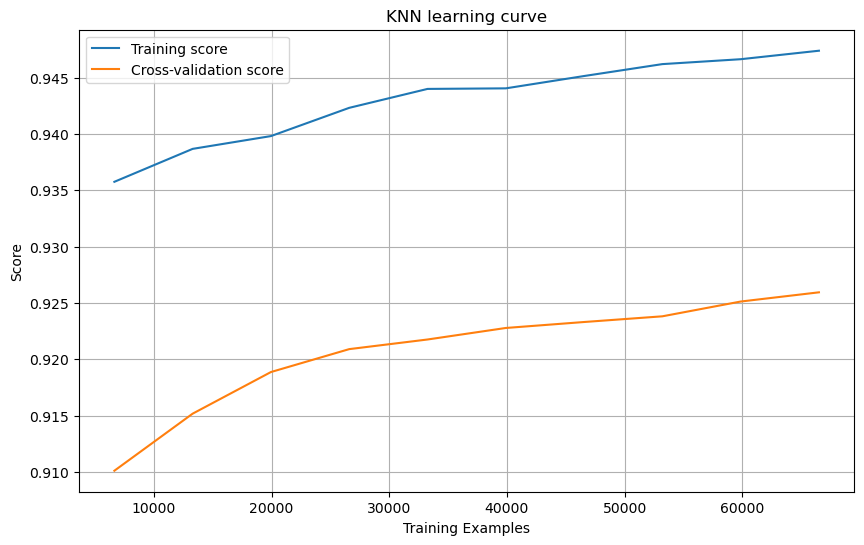

In [136]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(KNeighborsClassifier(), x_train_scaled, y_train, "KNN learning curve")

DECISION TREE

In [137]:
# Basic Decision Tree
dt = DecisionTreeClassifier(random_state=123, max_depth=10)
dt.fit(x_train_scaled, y_train.Satisfaction)
dt_val_pred = dt.predict(x_val_scaled)
print(f"Basic Decision Tree Accuracy: {accuracy_score(y_val.Satisfaction, dt_val_pred):.4f}") #better result than KNN

Basic Decision Tree Accuracy: 0.9463


In [138]:
# Hyperparameter tuning
dt_param_grid = {
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=123), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train_scaled, y_train.Satisfaction)
dt_grid_val_pred = dt_grid_search.predict(x_val_scaled)

print(f"Tuned DT Accuracy: {accuracy_score(y_val.Satisfaction, dt_grid_val_pred):.4f}") 

print("\nDecision Tree Grid Search Results:") 
print(f"Best parameters: {dt_grid_search.best_params_}") 
print(f"Best cross-validation accuracy: {dt_grid_search.best_score_:.4f}")

best_dt = dt_grid_search.best_estimator_ #similar accuracy to random hyperparameters

Tuned DT Accuracy: 0.9462

Decision Tree Grid Search Results:
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation accuracy: 0.9448


RANDOM FOREST

In [139]:
# Basic Random Forest
rf = RandomForestClassifier(random_state=123, n_estimators=10, max_depth=15)
rf.fit(x_train_scaled, y_train.Satisfaction)
rf_val_pred = rf.predict(x_val_scaled)
print(f"Basic Random Forest Accuracy: {accuracy_score(y_val, rf_val_pred):.4f}") #better than Decision Tree

Basic Random Forest Accuracy: 0.9558


In [140]:
# Hyperparameter tuning
rf_param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=123), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train_scaled, y_train.Satisfaction)
rf_grid_val_pred = rf_grid_search.predict(x_val_scaled)

print(f"Tuned RF Accuracy: {accuracy_score(y_val.Satisfaction, rf_grid_val_pred):.4f}") 
print("\nRandom Forest Grid Search Results:")
print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation accuracy: {rf_grid_search.best_score_:.4f}")

best_rf = rf_grid_search.best_estimator_ #improvement of accuracy

Tuned RF Accuracy: 0.9590

Random Forest Grid Search Results:
Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.9587


FINAL MODEL COMPARISON

In [141]:
# Create dictionary of best models
models = {
    'Logistic Regression': lr,
    'KNN': best_knn,
    'Decision Tree': best_dt,
    'Random Forest': best_rf
}

# Compare models on test set
results = {}

for name, model in models.items():
    # Make predictions on test set
    model = model.fit(x_train_scaled, y_train.Satisfaction)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test.Satisfaction, y_pred)
    results[name] = accuracy

    print(f"\n{name} Final Test Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test.Satisfaction, y_pred))


Logistic Regression Final Test Results:
Accuracy: 0.8742

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14662
           1       0.87      0.83      0.85     11314

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976


KNN Final Test Results:
Accuracy: 0.9371

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14662
           1       0.95      0.90      0.93     11314

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.94     25976
weighted avg       0.94      0.94      0.94     25976


Decision Tree Final Test Results:
Accuracy: 0.9449

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14662
           1 

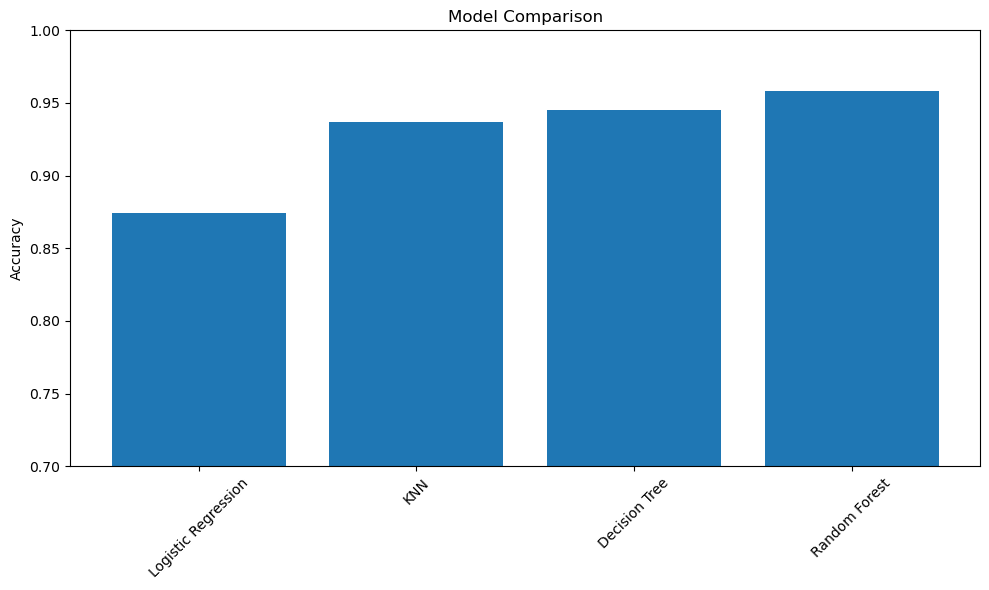

In [142]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() #Random Forest with the highest value of accuracy

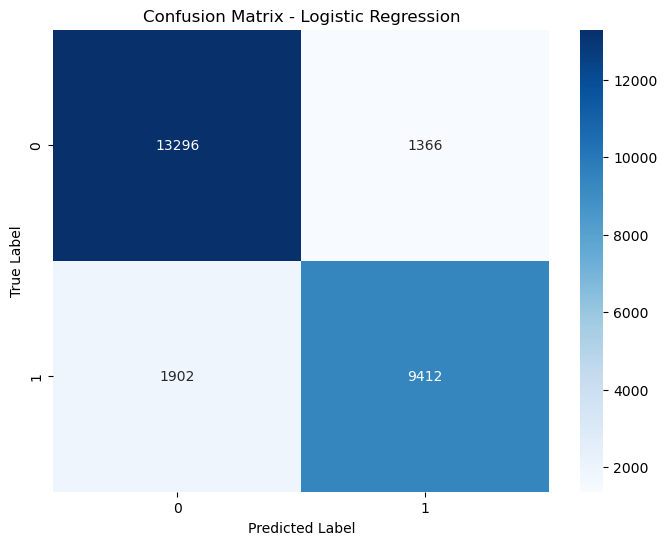

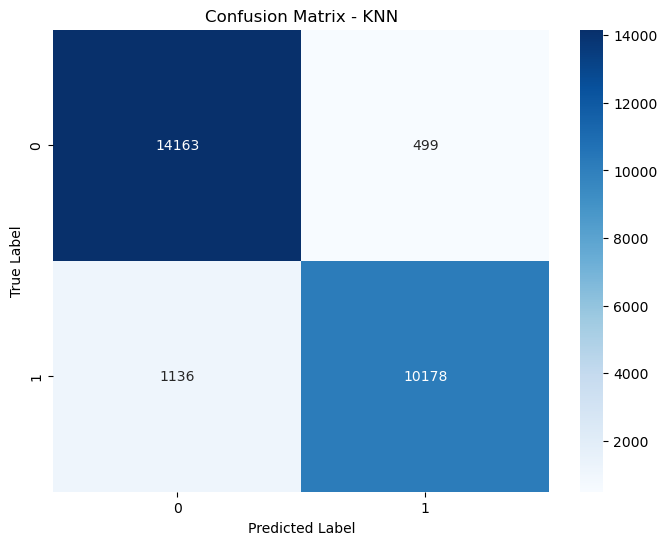

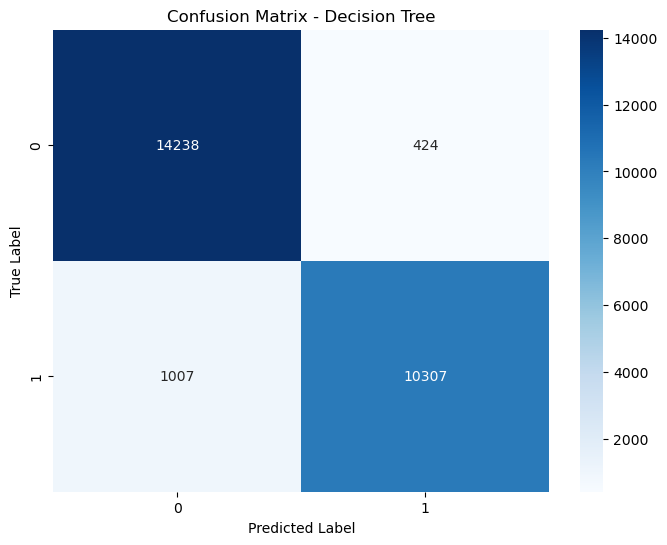

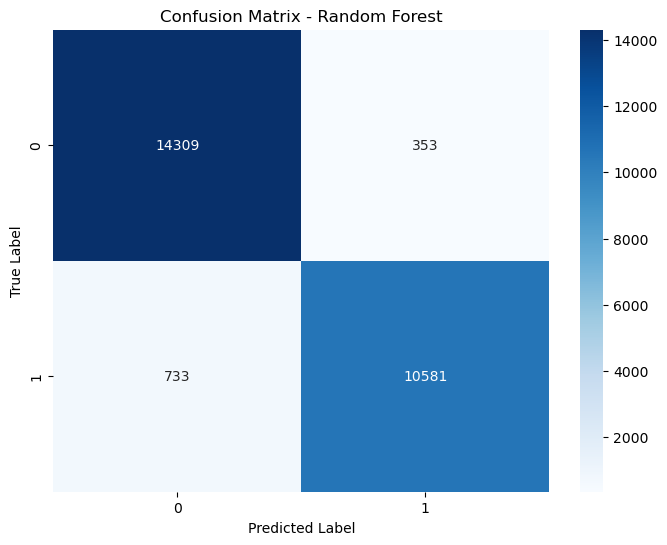

In [143]:
#Matrix that shows [TN, FN, FP, TP] for each model
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    plot_confusion_matrix(y_test.Satisfaction, y_pred, f'Confusion Matrix - {name}') #gradual decrease of FN,FP

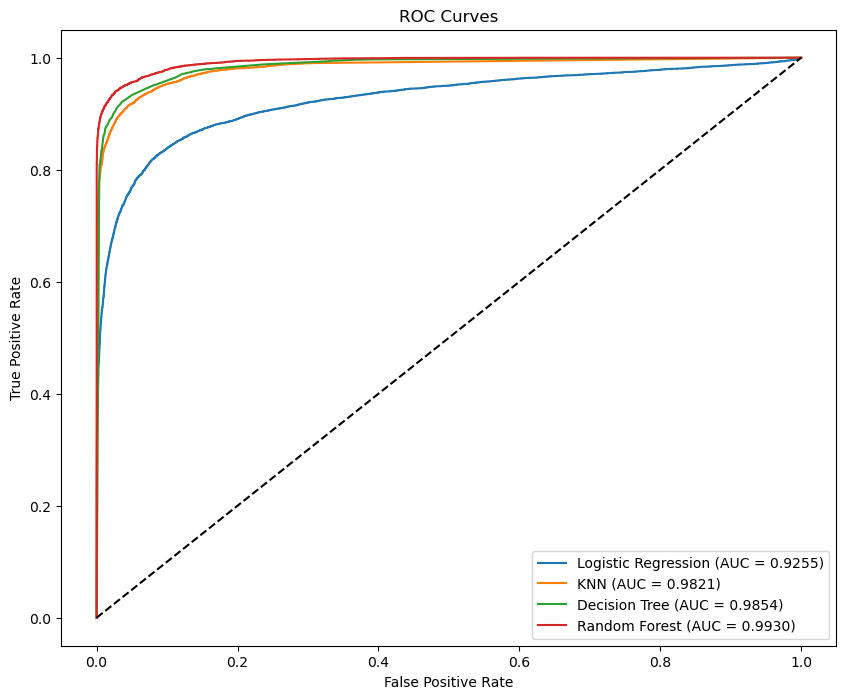

In [144]:
#Plot of ROC Curve for each model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for name, model in models.items():
  if name not in ("SVM"):
    y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

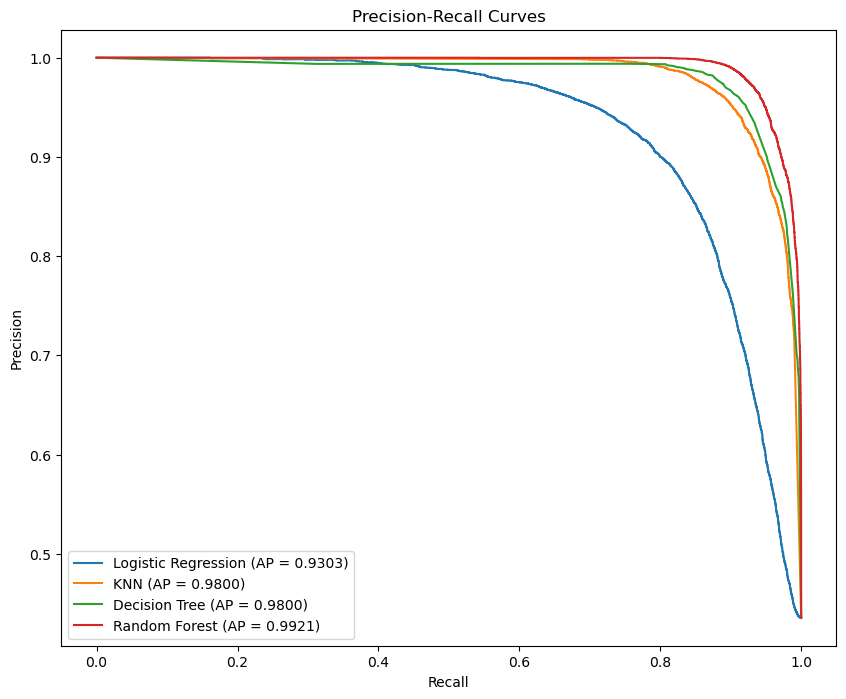

In [145]:
#Plot of Precision-Recall curve for each model
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))
for name, model in models.items():
    if name not in ("SVM"):
      y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]
      precision, recall, _ = precision_recall_curve(y_test.Satisfaction, y_pred_proba)
      avg_precision = average_precision_score(y_test.Satisfaction, y_pred_proba)
      plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()


II Now, let's compare same models for selected in logistic regression tuning features

In [146]:
#scaling the datasets 
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x_train_scaled= scaler.fit_transform(x_train_17)
x_val_scaled=scaler.fit_transform(x_val_17)
x_test_scaled = scaler.fit_transform(x_test_17)

In [147]:
# Basic KNN
knn = KNeighborsClassifier(n_neighbors=20, weights="uniform", metric='euclidean')
knn.fit(x_train_scaled, y_train.Satisfaction)
knn_val_pred = knn.predict(x_val_scaled)
print(f"Basic KNN Accuracy: {accuracy_score(y_val.Satisfaction, knn_val_pred):.4f}") #better accuracy than for KNN with all variables

Basic KNN Accuracy: 0.9324


In [148]:
# Hyperparameter tuning
knn_param_grid = {
    'n_neighbors': [5, 11, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(x_train_scaled, y_train.Satisfaction)
knn_grid_val_pred = knn_grid_search.predict(x_val_scaled)

print(f"Tuned KNN Accuracy: {accuracy_score(y_val.Satisfaction, knn_grid_val_pred):.4f}") 
print("\nKNN Grid Search Results:")
print(f"Best parameters: {knn_grid_search.best_params_}")
print(f"Best cross-validation accuracy: {knn_grid_search.best_score_:.4f}") 

best_knn = knn_grid_search.best_estimator_ #same optimal hyperparameters, better accuracy

Tuned KNN Accuracy: 0.9418

KNN Grid Search Results:
Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation accuracy: 0.9421


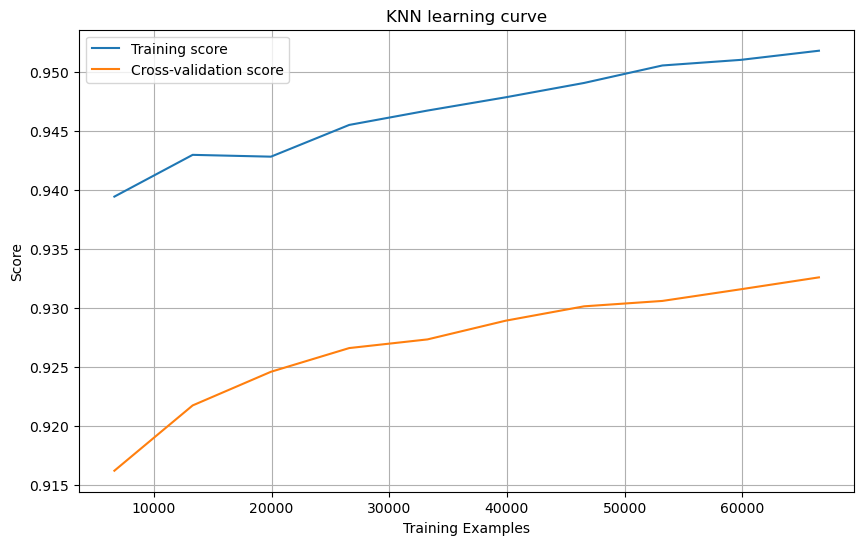

In [149]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(KNeighborsClassifier(), x_train_scaled, y_train, "KNN learning curve")

DECISION TREE

In [150]:
# Basic Decision Tree
dt = DecisionTreeClassifier(random_state=123, max_depth=10)
dt.fit(x_train_scaled, y_train.Satisfaction)
dt_val_pred = dt.predict(x_val_scaled)
print(f"Basic Decision Tree Accuracy: {accuracy_score(y_val.Satisfaction, dt_val_pred):.4f}") #decreased accuracy

Basic Decision Tree Accuracy: 0.9429


In [151]:
# Hyperparameter tuning
dt_param_grid = {
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=123), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train_scaled, y_train.Satisfaction)
dt_grid_val_pred = dt_grid_search.predict(x_val_scaled)

print(f"Tuned DT Accuracy: {accuracy_score(y_val.Satisfaction, dt_grid_val_pred):.4f}") 

print("\nDecision Tree Grid Search Results:") 
print(f"Best parameters: {dt_grid_search.best_params_}") 
print(f"Best cross-validation accuracy: {dt_grid_search.best_score_:.4f}")

best_dt = dt_grid_search.best_estimator_ #same optimal hyperparameters, lower accuracy

Tuned DT Accuracy: 0.9431

Decision Tree Grid Search Results:
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation accuracy: 0.9431


RANDOM FOREST

In [152]:
# Basic Random Forest
rf = RandomForestClassifier(random_state=123, n_estimators=10, max_depth=15)
rf.fit(x_train_scaled, y_train.Satisfaction)
rf_val_pred = rf.predict(x_val_scaled)
print(f"Basic Random Forest Accuracy: {accuracy_score(y_val, rf_val_pred):.4f}") #increased accuracy

Basic Random Forest Accuracy: 0.9586


In [153]:
# Hyperparameter tuning
rf_param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=123), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train_scaled, y_train.Satisfaction)
rf_grid_val_pred = rf_grid_search.predict(x_val_scaled)

print(f"Tuned RF Accuracy: {accuracy_score(y_val.Satisfaction, rf_grid_val_pred):.4f}") 
print("\nRandom Forest Grid Search Results:")
print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation accuracy: {rf_grid_search.best_score_:.4f}")

best_rf = rf_grid_search.best_estimator_ #same optimal hyperparameters, better accuracy

Tuned RF Accuracy: 0.9620

Random Forest Grid Search Results:
Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.9594


FINAL MODEL COMPARISON

In [154]:
# Create dictionary of best models
models = {
    'Logistic Regression': lr,
    'KNN': best_knn,
    'Decision Tree': best_dt,
    'Random Forest': best_rf
}

# Compare models on test set
results = {}

for name, model in models.items():
    # Make predictions on test set
    model = model.fit(x_train_scaled, y_train.Satisfaction)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test.Satisfaction, y_pred)
    results[name] = accuracy

    print(f"\n{name} Final Test Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test.Satisfaction, y_pred))


Logistic Regression Final Test Results:
Accuracy: 0.8723

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14662
           1       0.87      0.83      0.85     11314

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976


KNN Final Test Results:
Accuracy: 0.9403

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14662
           1       0.96      0.90      0.93     11314

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976


Decision Tree Final Test Results:
Accuracy: 0.9434

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14662
           1 

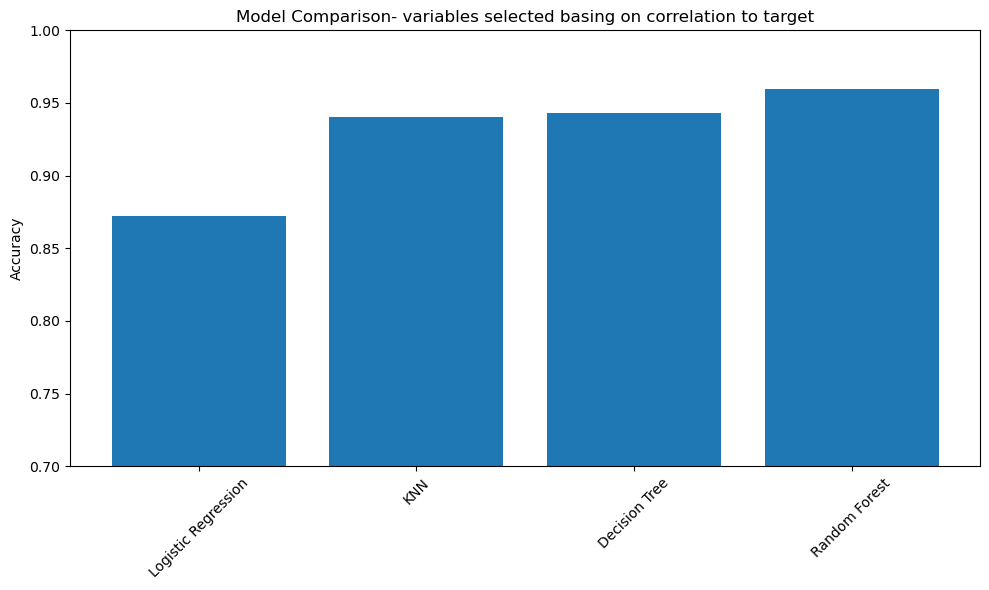

In [155]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Comparison- variables selected basing on correlation to target')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() #Random Foresr with the highest value of accuracy

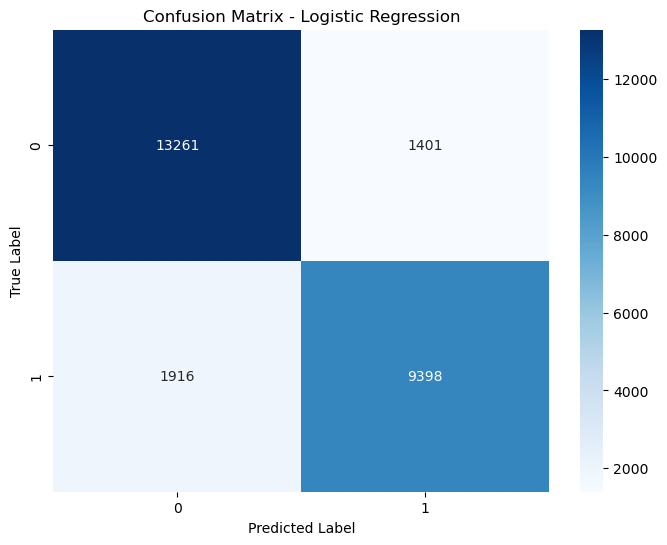

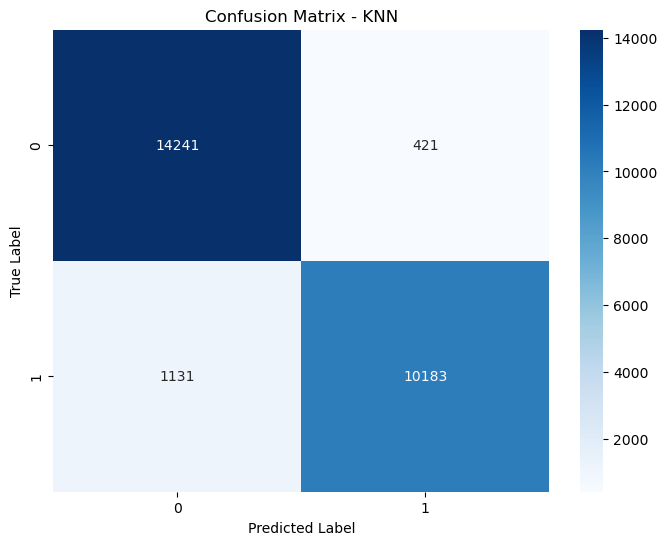

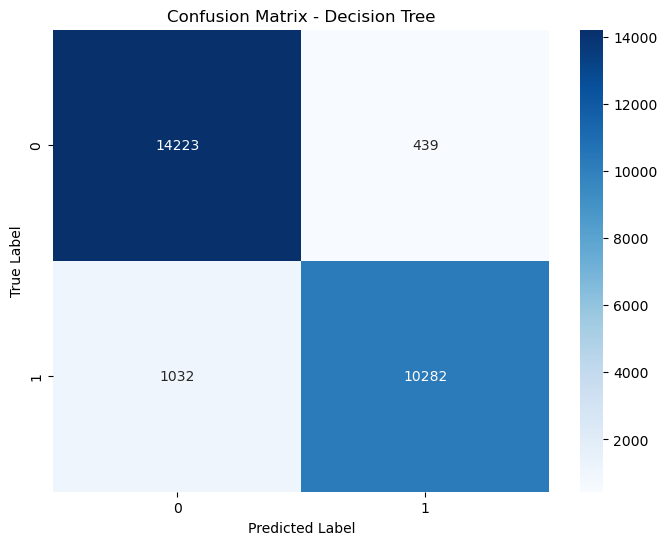

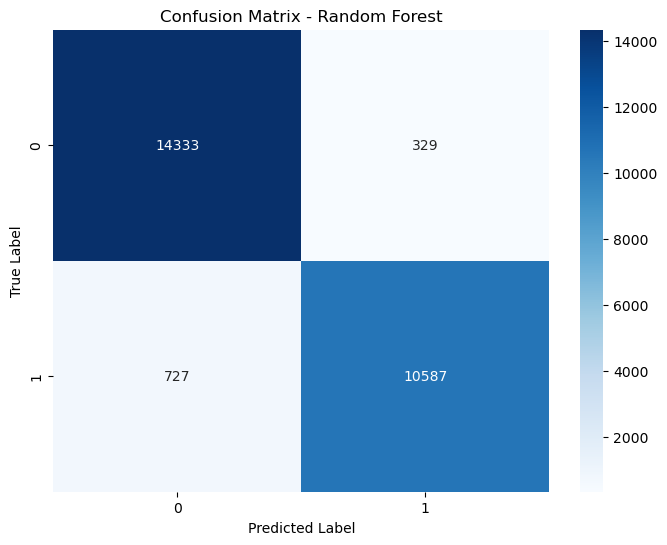

In [156]:
#Matrix that shows [TN, FN, FP, TP] for each model
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    plot_confusion_matrix(y_test.Satisfaction, y_pred, f'Confusion Matrix - {name}')

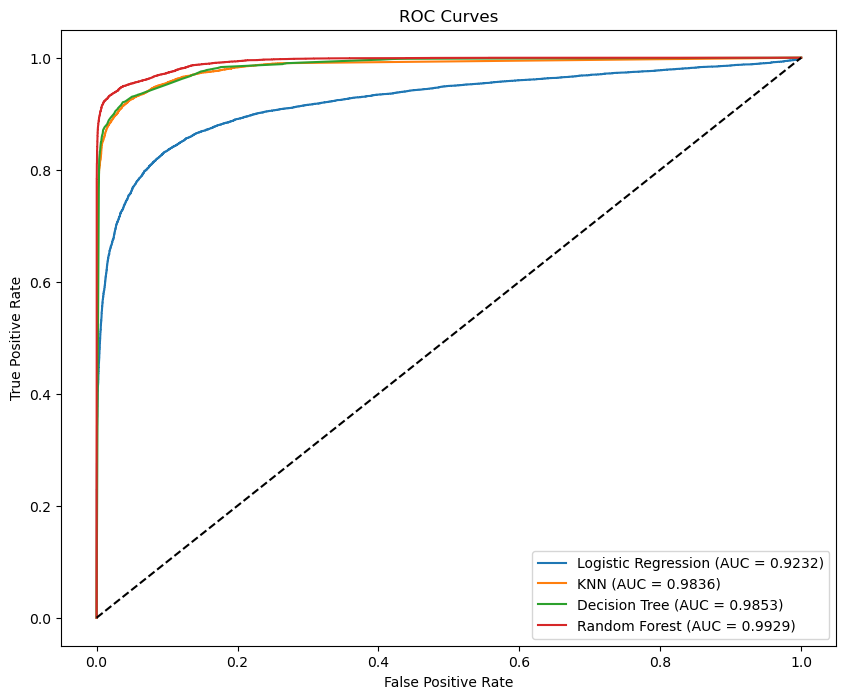

In [157]:
#Plot of ROC Curve for each model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for name, model in models.items():
  if name not in ("SVM"):
    y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

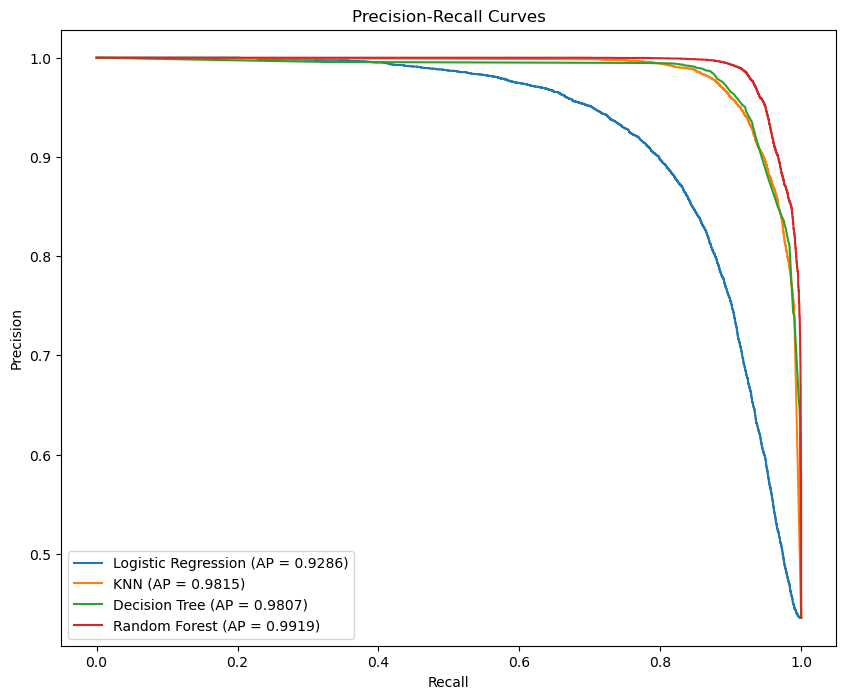

In [158]:
#Plot of Precision-Recall curve for each model
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))
for name, model in models.items():
    if name not in ("SVM"):
      y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]
      precision, recall, _ = precision_recall_curve(y_test.Satisfaction, y_pred_proba)
      avg_precision = average_precision_score(y_test.Satisfaction, y_pred_proba)
      plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()


Conclusion: features selection beneficial for KNN and RF but not for Logistic Regression and Decision Tree